# A. Problem Definition

# B. Data Acquisition

## 1.Read file csv

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

In [10]:
working_path = '/content/drive/MyDrive/'

In [11]:
# 1. Read file
df = pd.read_csv(working_path + 'rawdata.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/rawdata.csv'

In [ ]:
# 2. Shape check
df.shape

## 2.Data description

In [ ]:
# Fist look
df.head()

In [ ]:
# Structure
df.info()

In [ ]:
df.describe(include="all")

> **Remark**
*   **Categorical features**: DiaChi, TinhTrangBDS, TenPhanKhu, Loai, GiayTo, MaCanHo, TinhTrangNoiThat, HuongCuaChinh, HuongBanCong, DacDiem

*   **Numerical features**: DienTich, Gia/m2, PhongNgu, SoTang, PhongTam

* **Target**: Gia
-----------------------------------------------
>**Nhận xét**
*   Tên cột chưa được chuẩn hóa: Có ký tự đặc biệt, định dạng không đồng nhất giữa các tên

*   Đa số features chứa dữ liệu có định dạng không đồng nhất và dtype không phù hợp (hầu hết thuộc dạng Object)

*   Tỷ lệ dữ liệu rất lệch, thiếu dữ liệu nặng ở nhiều cột:

    * DiaChi, TinhTrangBDS, DienTich, Gia/m2, Phongngu, Loai, PhongTam, Gia gần như đầy đủ

    * MaCanHo: Thiếu gần 86%

    * DacDiem:Thiếu gần 77%

    * SoTang: Thiếu gần 73%

    * TenPhanKhu:Thiếu gần 72%

    * HuongBanCong, HuongCuaChinh, TinhTrangNoiThat: Thiếu 40-50%

* Nghi ngờ ouliers: Có nhà cao đột biến (789 tầng)
-----------------------------------------------
>**Nhận định ban đầu**

* **Necessary features**: DienTich, DiaChi, Loai, PhongNgu, PhongTam, SoTang

* **Optional features**: TinhTrangNoiThat, DacDiem, HuongCuaChinh, HuongBanCong


## 3.Data dictionary

| Feature | Mô tả (đơn vị nếu có) |
| :------ | :---------------------|
| MaCanHo | Mã định danh của căn hộ. Dạng chuỗi. |
| DiaChi | Địa chỉ bất động sản (quận, phường, TP. HCM). |
| LoaiHinh | Loại hình căn hộ: thương mại, nhà ở xã hội, officetel, studio. |
| TinhTrangBDS | Tình trạng pháp lý hoặc tiến độ: đang xây dựng, sắp bàn giao, đã bàn giao. |
| DienTich | Diện tích sử dụng theo sổ hồng. Đơn vị: m². |
| Gia | Giá bán căn hộ. Đơn vị: triệu đồng hoặc tỷ đồng. |
| Gia_m2 | Giá bán trên mỗi mét vuông. Đơn vị: triệu đồng/m². |
| PhongNgu | Số phòng ngủ. |
| PhongTam | Số phòng tắm/nhà vệ sinh. |
| SoTang | Tầng vị trí căn hộ. |
| TenPhanKhu | Block hoặc phân khu của dự án. |
| TinhTrangNoiThat | Tình trạng nội thất: đầy đủ, cơ bản, không nội thất. |
| HuongCuaChinh | Hướng cửa chính. |
| HuongBanCong | Hướng ban công. |
| DacDiem | Đặc điểm căn hộ: căn góc, căn giữa, view sông, view nội khu. |
| GiayToPhapLy | Tình trạng pháp lý: có sổ hồng, chờ cấp, tranh chấp. |

# C. Data Cleaning

## 1.Loại bỏ các features không cần thiết

In [ ]:
# 1. Tìm các features không cần thiết
# 1.1 Tìm High missing rate: Tính tỷ lệ % dữ liệu bị thiếu ở mỗi cột
missing_ratio = df.isnull().sum() / len(df) * 100

# 1.2 Tìm IDs: Đếm số lượng giá trị duy nhất (để phát hiện ID)
unique_counts = df.nunique()

# Tạo bảng báo cáo
drop_report = pd.DataFrame({
    'Missing_Percent (%)': missing_ratio,
    'Unique_Values': unique_counts,
    'Data_Type': df.dtypes
})

# Sắp xếp theo mức độ thiếu dữ liệu giảm dần
display(drop_report.sort_values(by='Missing_Percent (%)', ascending=False))

> **Remark**: Features cần loại bỏ
* MaCanHo: ID không có giá trị dự báo

* TenPhanKhu: Hơn 70% dữ liệu thiếu và các ngôi nhà có thể ở khác dự án/chung cư khác nhau nên không thể so sánh

* DacDiem, soTang, HuongBanCong, HuongCuaChinh: Tuy thiếu nhiều nhưng đây là những yếu tố tiềm năng ảnh hưởng đến Gia (Target) nên xử lý kĩ hơn ở Phần Handle missing values

----------------------------------------------------------
> **Next Action**:

*   **Loại features**: MaCanHo, TenPhanKhu

*   **Handle missing values**: DacDiem, HuongBanCong, HuongChinh, TinhTrangNoiThat, GiayTo, PhongTam, Gia/m2, DienTich, TinhTrangBDS, Loai, PhongNgu




In [ ]:
# 2. Loại features
df.drop(columns=['MaCanHo', 'TenPhanKhu'], inplace=True)
print('Số features còn lại: ',df.shape[1])

## 2.Categorical features

In [ ]:
# Selecting categorical features
## Lọc
categorical_features = ['DiaChi',
                        'TinhTrangBDS', 'TinhTrangNoiThat',
                        'Loai', 'GiayTo',
                        'HuongCuaChinh', 'HuongBanCong',
                        'DacDiem']

## Chọn
print('Số lượng features categorical: ', len(categorical_features))
print(df[categorical_features])

### DiaChi


In [ ]:
df['DiaChi'].head()

> **Remark**: High Cardinality
*   DiaChi có độ đa dạng quá cao: Mỗi dòng là một địa chỉ khác nhau

*   Đưa nguyên cột vào mô hình, máy tính sẽ phải nhớ hàng nghìn quy tắc cho từng số nhờ -> Overfitting (Chỉ nhớ nhà đó giá bao nhiêu chứ không đoán được nhà khác)

*  Vì có rất nhiều con đường nên trích xuất đường cũng sẽ khiến mô hình ảnh hưởng xấu:
  * High Cardinality -> Delay, Overfitting
  * Độ nhiễu cao: Cùng con đường nhưng người ghi "Đường 3/2", người ghi "Đường Ba Tháng Hai", người ghi "Đ. 3-2" -> Xử lý phức tạp nhưng không đáng
  * Quận/Huyện quyết định 80% mức giá cơ bản (Quận 1 chắc chắn đắt hơn Quận 12). Tên đường chỉ tinh chỉnh 20% còn lại.

------------------------------------------------------
> **Action**: Geographical Extraction

* Quy tắc 80/20: Trích xuất Quận/Huyện thành cột mới và bỏ địa chỉ chi tiết




In [ ]:
# HÀM TRÍCH XUẤT QUẬN/HUYỆN TỪ ĐỊA CHỈ DÀI
import pandas as pd
import re

# --- LỚP 1: TRÍ TUỆ (TỪ ĐIỂN MAPPING) ---
# Biến thể
district_mapping = {
    # 1. Nhóm Huyện (Dễ bị viết tắt/sai nhất -> Ưu tiên số 1)
    'bình chánh': 'Huyện Bình Chánh', 'binh chanh': 'Huyện Bình Chánh',
    'nhà bè': 'Huyện Nhà Bè', 'nha be': 'Huyện Nhà Bè',
    'hóc môn': 'Huyện Hóc Môn', 'hoc mon': 'Huyện Hóc Môn',
    'củ chi': 'Huyện Củ Chi', 'cu chi': 'Huyện Củ Chi',
    'cần giờ': 'Huyện Cần Giờ', 'can gio': 'Huyện Cần Giờ',

    # 2. Nhóm Thành phố Thủ Đức (Gộp Q2, Q9, Thủ Đức cũ)
    'thủ đức': 'Thành phố Thủ Đức', 'thu duc': 'Thành phố Thủ Đức',
    'quận 2': 'Thành phố Thủ Đức', 'quan 2': 'Thành phố Thủ Đức',
    'quận 9': 'Thành phố Thủ Đức', 'quan 9': 'Thành phố Thủ Đức',

    # 3. Nhóm Quận Tên Riêng
    'tân phú': 'Quận Tân Phú', 'tan phu': 'Quận Tân Phú',
    'bình tân': 'Quận Bình Tân', 'binh tan': 'Quận Bình Tân',
    'phú nhuận': 'Quận Phú Nhuận', 'phu nhuan': 'Quận Phú Nhuận',
    'bình thạnh': 'Quận Bình Thạnh', 'binh thanh': 'Quận Bình Thạnh',
    'tân bình': 'Quận Tân Bình', 'tan binh': 'Quận Tân Bình',
    'gò vấp': 'Quận Gò Vấp', 'go vap': 'Quận Gò Vấp',
}

def extract_district(address_str):
    # Bước 0: Kiểm tra rỗng
    if not isinstance(address_str, str): return 'Khác'

    addr_lower = address_str.lower()

    # --- CHIẾN THUẬT 1: QUÉT TỪ ĐIỂN (Lookup) ---
    # Bắt dính ngay các trường hợp: "binh chanh", "thu duc", "quan 2"
    for key, standard_name in district_mapping.items():
        if key in addr_lower:
            return standard_name

    # --- CHIẾN THUẬT 2: BẮT QUẬN SỐ (Regex) ---
    # Bắt dính các trường hợp: "Quận 1", "Q.1", "q1", "Q 10"
    match = re.search(r'(?:quận|q\.?|q)\s*([0-9]{1,2})', addr_lower)
    if match:
        district_num = int(match.group(1))
        if 1 <= district_num <= 12:
            return f'Quận {district_num}'

    # --- CHIẾN THUẬT 3: VÉT CẠN THEO CẤU TRÚC  ---
    # Nếu 2 cách trên thất bại, ta dùng cách tách dấu phẩy để tìm chữ "Quận/Huyện" còn sót
    # Ví dụ: "Đường A, Khu B, Quận Mới Lạ, HCM" (Trường hợp hiếm)
    parts = address_str.split(',')
    for part in reversed(parts):
        part = part.strip()
        # Logic: Có chữ Quận/Huyện/Thành phố NHƯNG không phải là "Tp Hồ Chí Minh"
        # Vì tp HCM trực thuộc trung ương
        if ('Quận' in part or 'Huyện' in part or 'Thành phố' in part) and 'Hồ Chí Minh' not in part:
            return part

    return 'Khác'

In [ ]:
# Tạo cột 'Quan'
df['Quan'] = df['DiaChi'].apply(extract_district)

# Kiem tra
display(df[['DiaChi', 'Quan']].head())
print("\nSố lượng quận tìm được:", df['Quan'].nunique())
print(f"Số lượng 'Khác': {(df['Quan'] == 'Khác').sum()}")

print("\n=== SỐ LƯỢNG NHÀ Ở TỪNG QUẬN ===")
print(df['Quan'].value_counts())

In [ ]:
# Kiểm tra những địa chỉ không trích xuất được quận/huyện
df[df['Quan'] == 'Khác']['DiaChi'].head(5)

In [ ]:
df[df['Quan'] == 'Khác']['DiaChi'].to_csv('CantExtractDistrict.csv', encoding='utf-8-sig')

In [ ]:
# Loại cột 'DiaChi' thừa
df.drop(columns=['DiaChi'], inplace=True)
print(df.columns)

> **Remark**: DiaChi

*   Sau khi kiểm tra từng dòng trong những địa chỉ không trích xuất được quận em rút ra được lí do: Những địa chỉ này chỉ có tên đường không có tên quận/huyện

* Nhưng do số lượng những giá trị 'Khác' rất nhỏ so với toàn bộ dữ liệu (chiếm khoảng 0.01%) -> Không truy xuất tên đường thuộc Quận/Huyện nào, vẫn lưu giá trị 'Khác'


### TinhTrangBDS

In [ ]:
df['TinhTrangBDS'].value_counts(dropna= False)

> **Remark:**
*   Missing values: 25 (rất nhỏ)

*   Nhận thấy TinhTrangBDS là Binary Feature

------------------------------------------------
> **Action:**

*   Xử lý missing values: Điền khuyết bằng giá trị phổ biến nhất. Vì dữ liệu có giá trị phổ biến vượt trội và số lượng missing values rất ít (Mode Imputation)

*   Binary Encoding: Biến chữ thành số 0/1


In [ ]:
# 1. Mode imputation
mode_val = df['TinhTrangBDS'].mode()[0]
df['TinhTrangBDS'] = df['TinhTrangBDS'].fillna(mode_val)

In [ ]:
# Kiểm tra
df['TinhTrangBDS'].value_counts(dropna = False)

In [ ]:
# 2. Binary Encoding
status_mapping = {
    'Đã bàn giao': 1,
    'Chưa bàn giao': 0
}

# Xóa khoảng trắng thừa
df['TinhTrangBDS'] = df['TinhTrangBDS'].astype(str).str.strip()
df['TinhTrangBDS'] = df['TinhTrangBDS'].map(status_mapping)

In [ ]:
# Kiểm tra
df['TinhTrangBDS'].value_counts(dropna = False)

> **Remark:** TinhTrangBDS
*   19928 căn nhà đã bàn giao trên tổng số 24949 căn nhà được đăng bán -> Đa số các nhà đăng bán đều đã được bàn giao (khoảng 80%)





### TinhTrangNoiThat

In [ ]:
df['TinhTrangNoiThat'].value_counts(dropna=False)

> **Remark**

*   Nhiều  missing values (Khoảng 49% dữ liệu)

*   Dữ liệu có thứ tự rõ ràng về giá trị tiền bạc: Thô < Cơ bản < Đầy đủ < Cao cấp

----------------------------------------------------

> **Action**

* Xử lý missing values: Điền tất cả ô trống (NaN) thành một nhóm thấp nhất: "Không có/Thô". Vì nếu nhà có nội thất xịn, người bán chắc chắn sẽ khoe. Nếu họ im lặng (bỏ trống), khả năng cao là "Không có nội thất" hoặc "Bàn giao thô".

* Ordinal Encoding: Gán số theo cấp độ tăng dần (0, 1, 2..)

In [ ]:
# 1. Imputation: Không ghi gì = Mức thấp nhất (Thô/Không có)
df['TinhTrangNoiThat'] = df['TinhTrangNoiThat'].fillna('Thô')

In [ ]:
# Kiểm tra
df['TinhTrangNoiThat'].value_counts(dropna=False)

In [ ]:
# 2. Ordinal Encoding
noithat_mapping = {
    # Nhóm Cao cấp (3 điểm)
    'Nội thất cao cấp': 3,
    'Cao cấp': 3,

    # Nhóm Đầy đủ (2 điểm)
    'Nội thất đầy đủ': 2,
    'Đầy đủ': 2,

    # Nhóm Cơ bản (1 điểm)
    'Nội thất cơ bản': 1,
    'Hoàn thiện cơ bản': 1,
    'Cơ bản': 1,

    # Nhóm Thô/Không có (0 điểm)
    'Bàn giao thô': 0,
    'Thô': 0,
    'Nhà trống': 0,
}

# Xóa khoảng trắng thừa
df['TinhTrangNoiThat'] = df['TinhTrangNoiThat'].astype(str).str.strip()
df['TinhTrangNoiThat'] = df['TinhTrangNoiThat'].map(noithat_mapping)

In [ ]:
# Kiểm tra
df['TinhTrangNoiThat'].value_counts(dropna=False)

> **Remark:** TinhTrangNoiThat
*   Hầu hết các nhà được đăng bán có nội thất cơ bản, thô hoặc không có nội thất



### Loai

In [ ]:
df['Loai'].value_counts(dropna=False)

> **Remark**

*   Missing value rất ít (chiếm khoảng 0.01%) và số lượng 'Chung cư' chiếm đa số áp đảo (Khoảng 91% dữ liệu)

*   Nhận thấy đây là Nominal Variable: Các giá trị thể hiện các chức năng, thỏa mãn các nhu cầu khác nhau và có ảnh hưởng đến giá nhà. Bên cạnh đó, giá trị hiếm nhất cũng đủ lớn (64 Tập thể, cư xá) -> Tất cả các loại hình bất động sản này đều có ý nghĩa thống kê

---------------------------------------------------------

> **Action**

* Xử lý missing values: Mode imputation -> Khả năng đúng cao

* Gom nhóm theo công năng và giá trị (gom thành những nhóm thực sự khác biệt về giá):
    * Chung cư: Nhóm thường có giá phổ thông
    * Hạng sang (Penthouse, Duplex, ..): Nhóm thường có giá cao
    * Văn phòng/Đầu tử (Officetel, Căn hộ dịch vụ,..): Nhóm thường có giá khác
    * Khác/Tập thể: Nhóm thường có giá thấp

* Lưu ý:
    * Nhóm theo giá 'thường có' chứ không nghiêm ngặt thứ tự. Đây không phải là ordinal variable

    * Đây là nominal variable. Nhưng ta không one - hot encoding hiện tại vì sẽ làm tăng số lượng cột, ảnh hưởng cleaning các cột còn lại. Mà chỉ gom nhóm cho gọn

In [ ]:
# 1. Mode imputation
df['Loai'] = df['Loai'].fillna(df['Loai'].mode()[0])

In [ ]:
# Kiểm tra
df['Loai'].value_counts(dropna=False)

In [ ]:
# 2. Gom nhóm theo giá trị, chức năng
# SỬ DỤNG HÀM CHUẨN HÓA TEXT TRƯỚC
def standardize_loai(loai):
    loai = loai.strip().lower()
    if 'penthouse' in loai or 'duplex' in loai:
        return 'Loai_Hang_Sang'
    if 'officetel' in loai or 'dịch vụ' in loai or 'mini' in loai:
        return 'Loai_Van_Phong'
    if 'chung cư' in loai:
        return 'Loai_Chung_Cu'
    # Các loại còn lại ('Tập thể, cư xá', 'Khác', ...)
    return 'Loai_Khac'

# TẠO TỪ ĐIỂN MÃ HÓA SỐ TẠM THỜI (TÙY Ý, CHỈ ĐỂ CHUẨN HÓA)
loai_final_mapping = {
    'Loai_Chung_Cu': 2,
    'Loai_Van_Phong': 1,
    'Loai_Hang_Sang': 3,
    'Loai_Khac': 0
}


df['Loai'] = df['Loai'].apply(standardize_loai)
df['Loai'] = df['Loai'].map(loai_final_mapping)

In [ ]:
# Kiểm tra
df['Loai'].value_counts(dropna=False)

> **Remark:** Loai

*   Đa số cái bài đăng bán chung cư   

---------------------------------------------

> **Next Action**

* Trước khi vào mô hình phải One - hot encode 'Loai'



### GiayTo

In [ ]:
df['GiayTo'].value_counts(dropna=False)

> **Remark**
* Ở Việt Nam pháp lý quyết định sống còn đến giá trị. Một căn nhà có Sổ hồng có thể đắt gấp đôi căn nhà chỉ có Giấy tay, dù hình thức y hệt nhau -> Đây là một trong những Killer Features

* Dữ liệu có thể nhiều nhưng em sẽ phân loại thành ba nhóm chính theo rủi ro:

    *  Nhóm An toàn (2 điểm): 'Đã có sổ' (Gồm sổ đỏ, sổ hồng). Đây là mức giá trị cao nhất

    * Nhóm Chờ đợi (1 điểm): 'Đang chờ sổ' (Rủi ro vừa phải, giá trị nhà sẽ thấp hơn nhóm 1)

    * Nhóm Rủi ro/ Khác (Điểm 0): 'Giấy tờ khác', 'Giấy tay',.. hoặc không ghi gì (NaN)

* Missing values: Khoảng 24% số nhà đăng bán không được cập nhật tình trạng pháp lí

------------------------------------------------------------

> **Action**

* Xử lý missing values: nếu người bán không khoe "Đã có sổ", ta mặc định xếp vào nhóm thấp nhất (Nhóm 0) -> An toàn là trên hết

* Simplified Ordinal Encoding

In [ ]:
# 1. Imputation: Không điền gì -> Không có sổ
df['GiayTo'] = df['GiayTo'].fillna('Giấy tờ khác')

In [ ]:
# Kiểm tra: 'Giấy tờ khác' != ' Giấy tờ khác'
df['GiayTo'].value_counts()

In [ ]:
# 2. Simplified Ordinal Encoding
legal_mapping = {
    # Nhóm An toàn (Cao nhất) -> 2
    'Đã có sổ': 2,
    'Sổ hồng': 2,
    'Sổ đỏ': 2,

    # Nhóm Trung bình -> 1
    'Đang chờ sổ': 1,
    'Đang làm sổ': 1,

    # Nhóm Rủi ro/Khác -> 0
    'Giấy tờ khác': 0,
    'Giấy tay': 0,
    'Vi bằng': 0,
    'Hợp đồng mua bán': 0
}

# Xóa khoảng trắng thừa
df['GiayTo'] = df['GiayTo'].astype(str).str.strip()
df['GiayTo'] = df['GiayTo'].map(legal_mapping)

In [ ]:
# Kiểm tra
df['GiayTo'].value_counts()

> **Remark:** GiayTo

* Dữ liệu quan trọng, ảnh hưởng cao đến giá trị nhà và khá cân đối -> Tham số tìm năng cho mô hình Dự đoán giá nhà

### HuonCuaChinh, HuongBanCong

In [ ]:
df['HuongCuaChinh'].value_counts(dropna=False)

In [ ]:
df['HuongBanCong'].value_counts(dropna=False)

> **Remark**

*   Nominal variables có giá trị thống kê, ảnh hưởng đến giá, tiềm năng cho tham số mô hình nên không thể drop

*   Missing values rất nhiều: Khoảng 62 - 65%.

----------------------------------------------------

> **Action**

* Missing values: Điền 'Khác' -> Không sai lệch mô hình

* Label Encoding tạm thời. Trước khi đưa vào mô hình phải OHE

In [ ]:
# 1. Imputation
df['HuongCuaChinh'] = df['HuongCuaChinh'].fillna('Khác')
df['HuongBanCong'] = df['HuongBanCong'].fillna('Khác')

# Kiểm tra
print("Hướng Cửa Chính:")
print(df['HuongCuaChinh'].value_counts(dropna = False))
print("-" * 20)
print("Hướng Ban Công:")
print(df['HuongBanCong'].value_counts(dropna= False))

In [ ]:
# 2. Label Encoding tạm thời
# HÀM LABEL ENCODING
direction_mapping = {
    'KXĐ': 0,       # Quan trọng nhất: Không xác định
    'Đông': 1,
    'Tây': 2,
    'Nam': 3,
    'Bắc': 4,
    'Đông Nam': 5,
    'Đông Bắc': 6,
    'Tây Nam': 7,
    'Tây Bắc': 8,
    'Khác': 9
}

target_cols = ['HuongCuaChinh', 'HuongBanCong']

for col in target_cols:
    # Map từ chữ sang số
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].map(direction_mapping)

    # Phòng hờ: Nếu có từ nào lạ chưa có trong từ điển -> Gán về 9 (Khác)
    df[col] = df[col].fillna(9)

# Kiểm tra
print("Hướng Cửa Chính:")
print(df['HuongCuaChinh'].value_counts(dropna = False))
print("-" * 20)
print("Hướng Ban Công:")
print(df['HuongBanCong'].value_counts(dropna = False))

> **Next Action**:

* Trước khi vào mô hình phải OHE 'HuongBanCong', 'HuongCuaChinh'





### DacDiem

In [ ]:
df['DacDiem'].value_counts(dropna=False)

> **Remark**

* Missing values rất nhiều chiếm (khoảng 78%)

* Đặc điểm "Căn góc" có tác động rõ rệt và tích cực đến giá trị bất động sản (do tăng mặt thoáng và ánh sáng). Không thể bỏ qua cột này.

* Dựa vào quan sát dữ liệu chỉ có giá trị NaN và 'Căn góc': Giá trị khuyết thiếu (NaN) không chỉ có nghĩa là "Không biết", mà còn là "Không có đặc điểm này"

-------------------------------------------------------

> **Action**

* Không Imputation vì không đúng ngữ cảnh, không sát mục đích, ý nghĩa và có thể làm sai lệch mô hình

* Dựa theo nguyên tắc Parsimony: Áp dụng Sparse Binary Flag
    * Chỉ ghi nhận giá trị "Căn góc" là đặc điểm vị trí có ý nghĩa trong mẫu dữ liệu: Biến DacDiem chuyển thành biến nhị phân CanGoc

      * Giá trị 1: Gán cho biến có chưa thông tin 'Căn góc' -> Giá cao

      * Giá trị 0: Gán cho các biến còn lại (Khuyết hoặc không phải căn góc) -> Giá thấp hơn

In [ ]:
import numpy as np

In [ ]:
# 1. Chuẩn hóa dữ liệu
df['DacDiem'] = np.where(df['DacDiem'].isna(), 0, 1)

In [ ]:
# 2. Chuẩn hóa tên cột
df.rename(columns={'DacDiem': 'CanGoc'}, inplace=True)

In [ ]:
# Kiểm tra
df['CanGoc'].value_counts(dropna=False)

> **Remark:** DacDiem

* Số ít nhà ở vị trí đắt địa -> giá cao

* CanGoc là potential nominal variable cho mô hình 'Dự đoán giá nhà'

## 3.Numerical features

In [ ]:
# Chuẩn hóa tên cột 'phongngu'
df.rename(columns={'Phongngu': 'PhongNgu'}, inplace=True)

In [ ]:
# Selecting numerical features
## Lọc
numerical_features = ['DienTich',
                      'Gia/m2',
                      'PhongNgu',
                      'SoTang',
                      'PhongTam']

## Chọn
print('Số lượng numerical features: ', len(numerical_features))
print('-'*50)
print(df[numerical_features])

### Gia

In [ ]:
df['Gia'].value_counts()

In [ ]:
# 1. HÀM TRÍCH XUẤT VÀ QUY ĐỔI GIÁ (VỀ ĐƠN VỊ TỶ VNĐ)
def process_total_price(value):
    if pd.isna(value) or str(value).strip() == '':
        return np.nan, np.nan # Trả về 2 giá trị NaN

    st = str(value).lower().replace(',', '.')

    # --- PHẦN 1: XỬ LÝ GIÁ (Logic cũ của em) ---
    price_val = np.nan

    # Tìm con số đầu tiên (Thường là giá)
    match_price = re.search(r"(\d+(\.\d+)?)", st)
    if match_price:
        num_val = float(match_price.group(1))

        # Logic quy đổi đơn vị (Tỷ/Triệu)
        if 'tỷ' in st:
            price_val = num_val
        elif 'triệu' in st:
            price_val = num_val / 1000.0
        else:
            # Logic đoán dựa trên độ lớn
            if num_val > 100:
                price_val = num_val / 1000.0
            else:
                price_val = num_val

    # --- PHẦN 2: XỬ LÝ DIỆN TÍCH ẨN (Logic Mới) ---
    area_val = np.nan

    # Chiến thuật Regex cho Diện tích:
    # Tìm dấu gạch ngang "-", khoảng trắng, con số, khoảng trắng, chữ "m2"
    # Ví dụ: "- 65 m2" hoặc "- 112 m2"
    match_area = re.search(r"-\s*(\d+(\.\d+)?)\s*m2", st)

    if match_area:
        # Lấy nhóm số tìm được
        area_val = float(match_area.group(1))

    # Trả về cả 2 giá trị cùng lúc (Tuple)
    return price_val, area_val

In [ ]:
# Check Gia (Target)
df['Gia_Clean'], df['DienTich_check'] = zip(*df['Gia'].apply(process_total_price))

In [ ]:
df['Gia_Clean'].isna().sum()

In [ ]:
# Missing values -> Xóa
df[df['Gia_Clean'].isna()]

In [ ]:
df.dropna(subset=['Gia_Clean'], inplace=True)
df[df['Gia_Clean'].isna()]

In [ ]:
print(df['Gia_Clean'].describe())

### Gia/m2

In [ ]:
df['Gia/m2'].value_counts()

In [ ]:
# HÀM TRÍCH XUẤT VÀ CHUẨN HÓA GIÁ/M2
def process_price_per_m2(value):
    if pd.isna(value) or str(value).strip() == '':
        return np.nan

    st = str(value).lower().strip()

    # Bước A: Trích xuất con số (Regex như cũ)
    # Bắt số có thể là: 27,69 hoặc 140.71
    match = re.search(r"(\d+([.,]\d+)?)", st)
    if not match:
        return np.nan

    num_str = match.group(0).replace(',', '.')
    try:
        val = float(num_str)
    except:
        return np.nan

    # Bước B: Xử lý Đơn vị (Unit Scaling)
    # Mặc định ta hiểu số lấy ra là "Triệu/m2" (vì nó phổ biến nhất)
    # Nhưng nếu trong chuỗi có chữ "tỷ" -> Nhân 1000
    if 'tỷ' in st:
        val = val * 1000
    # Nếu có chữ "nghìn" hoặc "đ" mà số lại quá lớn (ví dụ 25.000.000 đ/m2) -> Chia 1 triệu
    elif 'đ' in st:
        val = val / 1000
    # (Nhưng pattern regex trên chỉ bắt số đầu tiên, nên thường ta chỉ cần xử lý Tỷ)

    return val

In [ ]:
df['Gia_m2_Clean'] = df['Gia/m2'].apply(process_price_per_m2)

In [ ]:
print("=== THỐNG KÊ GIÁ/M2: TRIỆU  ===")
print(df['Gia_m2_Clean'].describe())

In [ ]:
df['Gia_m2_Clean'] = [m/1000 for m in df['Gia_m2_Clean']]

In [ ]:
print("=== THỐNG KÊ GIÁ/M2: TỶ  ===")
df['Gia_m2_Clean'].describe()

### DienTich

In [ ]:
print('Số missing values ở DienTich:', df['DienTich'].isna().sum())
df['DienTich'].value_counts(dropna=False)

> **Remark**

* Dữ liệu chưa được chuẩn hóa: Chứa đơn vị trong dữ liệu

* Dtype không phù hợp: Object thay vì Float

* Dữ liệu ảo: Những con số phi lí như 1 mét vuông, ..

-----------------------------------------------------------

> **Action**

* Regex Parsing & Type Casting & Rename column

* Kiểm tra chéo

* Outlier Investigation: Xử lý số ảo

In [ ]:
# 1. Regex Parsing
# HÀM TRÍCH XUẤT SỐ TỪ DIỆN TÍCH DẠNG OBJECT
def process_area(value):
    # Bước kiểm tra an toàn: Nếu là NaN hoặc rỗng -> Trả về NaN
    if pd.isna(value) or str(value).strip() == '':
        return np.nan

    st = str(value)

    # REGEX Pattern giải thích:
    # (\d+)       : Bắt nhóm số đầu tiên (Ví dụ: 68)
    # ([.,]\d+)?  : (Tùy chọn) Bắt dấu chấm/phẩy và số thập phân phía sau
    # Pattern này bắt được: "68", "68.5", "68,5 m2", "100m2"
    match = re.search(r"(\d+([.,]\d+)?)", st)

    if match:
        num_str = match.group(0) # Lấy chuỗi khớp (VD: "68,5")

        # Chuẩn hóa: Thay dấu phẩy (Việt Nam) thành dấu chấm (Python chuẩn)
        num_str = num_str.replace(',', '.')

        try:
            val = float(num_str)
            # Logic an toàn: Nếu diện tích <= 0 thì coi như lỗi (NaN)
            return val if val > 0 else np.nan
        except:
            return np.nan

    return np.nan

In [ ]:
# Trích xuất
df['DienTich_Clean'] = df['DienTich'].apply(process_area)

In [ ]:
# Kiểm tra
df[['DienTich','DienTich_Clean']].head()

In [ ]:
# 2. Kiểm tra chéo -> Phát hiện sai lệch
mask_error = (
    ((df['DienTich_Clean'])/
    (df['DienTich_check']))>= 10
  )

print(f"Phát hiện {mask_error.sum()} dòng dữ liệu bị nhập sai đơn vị.")

print("=== TRƯỚC KHI SỬA ===")
display(df.loc[mask_error, ['Gia','DienTich','DienTich_Clean', 'DienTich_check', 'Gia_Clean', 'Gia_m2_Clean']].head())

df.loc[mask_error, 'DienTich_Clean'] = df.loc[mask_error, 'DienTich_check']

print("\n=== SAU KHI SỬA ===")
display(df.loc[mask_error, ['DienTich_Clean', 'DienTich_check']].head())

### Missing values: Gia, Gia_m2, DienTich

In [ ]:
df.columns

In [ ]:
# Missing values: 'Gia_Clean'
df['Gia_Clean'].isna().sum()

In [ ]:
# Missing values: 'Gia_m2_Clean'
df['Gia_m2_Clean'].isna().sum()

In [ ]:
df[df['Gia_m2_Clean'].isna()][['Gia_m2_Clean', 'Gia/m2',
                   'DienTich', 'DienTich_Clean', 'DienTich_check',
                   'Gia', 'Gia_Clean']]

In [ ]:
df['Gia_m2_Clean'] = df['Gia_m2_Clean'].fillna(
    df['Gia_Clean'] / df['DienTich_check']
)

In [ ]:
# Check
df.loc[2473, ['Gia_m2_Clean', 'Gia_Clean', 'DienTich_check']]

In [ ]:
df['Gia_m2_Clean'].isna().sum()

In [ ]:
df[df['Gia_m2_Clean'].isna()][['Gia_m2_Clean', 'Gia/m2',
                   'DienTich', 'DienTich_Clean', 'DienTich_check',
                   'Gia', 'Gia_Clean']]

In [ ]:
df.dropna(subset=['Gia_m2_Clean'], inplace=True)

In [ ]:
df['Gia_m2_Clean'].isna().sum()

In [ ]:
# Missing values: DienTich_clean
index_na = df[df['DienTich_Clean'].isna()].index
print(df['DienTich_Clean'].isna().sum())

In [ ]:
df[df['DienTich_Clean'].isna()][['Gia_m2_Clean', 'Gia/m2',
                                  'DienTich', 'DienTich_Clean', 'DienTich_check',
                                  'Gia', 'Gia_Clean']].head()

In [ ]:
df['DienTich_Clean'] = df['DienTich_Clean'].fillna(
    df['Gia_Clean'] / df['Gia_m2_Clean']
)

In [ ]:
df.loc[index_na, ['DienTich_Clean', 'DienTich_check']].head()

In [ ]:
# Missing values: 'Gia'
df['Gia'].isna().sum()

In [ ]:
# 3. Outliers investigation
df['DienTich_Clean'].describe()

In [ ]:
# Vẽ Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước ảnh cho dễ nhìn
plt.figure(figsize=(16, 6))

# --- BIỂU ĐỒ 1: DỮ LIỆU GỐC (BỊ NHIỄU) ---
plt.subplot(1, 2, 1) # Vị trí bên trái
# Vẽ boxplot cột Diện tích hiện tại
sns.boxplot(x=df['DienTich_Clean'])
plt.title('Dữ liệu Gốc (Có Outlier)')
plt.xlabel('Diện tích (m2)')

# --- BIỂU ĐỒ 2: GIẢ LẬP DỮ LIỆU ĐÃ LÀM SẠCH ---
plt.subplot(1, 2, 2) # Vị trí bên phải

# Lọc tạm thời để vẽ
df_clean_temp = df[
    (df['DienTich_Clean'] >= 20) &
    (df['DienTich_Clean'] <= 120)
]

sns.boxplot(x=df_clean_temp['DienTich_Clean'])
plt.title('Dữ liệu Sau khi Lọc (20 - 120 m2)')
plt.xlabel('Diện tích (m2)')

plt.show()

> **Remark**

* max = 869 mét vuông:  Khá lớn

* min = 1 mét vuông: Không thể -> Dữ liệc rác

* std = 37, mean = 72: Chứng tỏ dữ liệu bị phân tán khá mạnh do các giá trị ngoại lai

* Dựa vào Boxplot cho thấy: Phần lớn dữ liệu nằm 30 - 110 mét vuông (Hợp lý)

-----------------------------------------------------------

> **Action**

* Thiết lập Safe Range: Dựa theo tình hình BDS VietNam
    * Lower Bound: 30 mét vuông (Dưới mức này không được coi là nhà ở hợp pháp hoặc thực tế)

    * Upper Bound: 110 mét vuông

In [ ]:
# Truy cập outliers: khoảng 0.06%
outliers = df[
    (df['DienTich_Clean'] < 30) |
    (df['DienTich_Clean'] > 110)
]

print('Số lượng outliers:', len(outliers))
print('-'*50)
outliers.head()

In [ ]:
# Truy cập outliers phi thực tế
extremely_outliers = df[
                              (df['DienTich_Clean'] == df['DienTich_Clean'].max()) |
                              (df['DienTich_Clean'] == df['DienTich_Clean'].min())
                              ]

print('Số lượng outliers phi thực tế:', len(extremely_outliers))
extremely_outliers.head()

In [ ]:
# drop: Vì quá ít nhưng giá trị quá lớn
df.drop(outliers.index, inplace=True)

In [ ]:
df[['Gia_m2_Clean', 'Gia/m2',
                   'DienTich', 'DienTich_Clean', 'DienTich_check',
                   'Gia', 'Gia_Clean']]

In [ ]:
df.drop(columns = ['Gia/m2', 'DienTich', 'DienTich_check', 'Gia'], inplace = True)

In [ ]:
df.rename(columns={'DienTich_Clean': 'DienTich_m2',
                   'Gia_m2_Clean' : 'Gia_m2',
                   'Gia_Clean' : 'Gia'}, inplace=True)
print(df.columns)

### SoTang

In [ ]:
print('Số missing values ở SoTang:', df['SoTang'].isna().sum())
df['SoTang'].value_counts(dropna=False)

Trong dataset, cột SoTang có 16 844 giá trị NaN, chiếm tỷ lệ rất lớn.

Khi một cột bị thiếu dữ liệu nặng, việc fill vào sẽ làm giảm chất lượng mô hình vì:

- Fill bằng median → làm mất phân bố thật

- Fill theo nhóm → không đủ thông tin để chính xác

- Giữ NaN → làm mô hình khó học

=> BỎ luôn cột SoTang

In [ ]:
# Xóa cột SoTang vì missing nhiều + outlier vô lý + không quan trọng
df = df.drop(columns=['SoTang'])

print("Đã xoá cột SoTang. Hiện tại còn các cột:")
print(df.columns)

### PhongNgu

In [ ]:
print('Số missing values ở PhongNgu:', df['PhongNgu'].isna().sum())
df['PhongNgu'].value_counts(dropna=False)

OK, không làm gì hết

Biến PhongNgu được giữ lại vì không có giá trị thiếu, phân bố hợp lý theo thực tế (1–3 phòng chiếm đa số), và các giá trị lớn hơn không phải là outlier vô lý mà là dữ liệu hợp lệ của các căn hộ cao cấp. Sau đó biến được chuyển đổi từ dạng văn bản sang dạng số để mô hình có thể xử lý.

### PhongTam

In [ ]:
print('Số missing values ở PhongTam:', df['PhongTam'].isna().sum())
df['PhongTam'].value_counts(dropna=False)

Tỉ lệ missing value thấp (<5%).

→ Không xoá cột, không xoá dòng.

→ Fill bằng mode.

In [ ]:
mode_value = df['PhongTam'].mode()[0]
df['PhongTam'].fillna(mode_value, inplace=True)

print("Mode PhongTam =", mode_value)
print('Số missing values ở PhongTam:', df['PhongTam'].isna().sum())
df['PhongTam'].value_counts(dropna=False)

###4.Handle duplicates

In [ ]:
print(f"Số lượng dòng trùng lặp: {df.duplicated().sum()}")
df[df.duplicated()].head()

In [ ]:
df = df.drop_duplicates()
print(f"Số lượng dòng trùng lặp sau khi xoá: {df.duplicated().sum()}")

In [ ]:
# Check structure
df.info()

## 5.Lưu file clean

In [ ]:
output_path = working_path + 'cleaned_data.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')

## 6.Chuẩn hóa dữ liệu bằng StandardScaler + One-Hot

In [ ]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# ===== FIX CÁC CỘT SỐ VẪN CÒN TEXT =====

# Với PhongNgu, PhongTam: trích số từ chuỗi (' 2 phòng' -> 2)
for col in ['PhongNgu', 'PhongTam']:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)                      # đảm bảo là string
            .str.extract(r'(\d+)')[0]         # lấy phần số nguyên đầu tiên
            .astype(float)                    # convert sang float (hoặc .astype(int))
        )
        # Fill NaN (nếu có) bằng mode
        df[col] = df[col].fillna(df[col].mode()[0])

# Đảm bảo các numeric feature khác thật sự là số
numeric_cols_force = [
    'DienTich_m2', 'Gia_m2',
    'TinhTrangBDS', 'TinhTrangNoiThat',
    'GiayTo', 'CanGoc'
]

for col in numeric_cols_force:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(df[numeric_cols_force + ['PhongNgu', 'PhongTam']].dtypes)
print("Các cột hiện có:", df.columns)

# Xác định target & features
target_col = 'Gia'   # cột giá nhà sau khi chuẩn hóa về tỷ

# Toàn bộ feature đầu vào (trừ target)
X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

# Khai báo các cột numeric & categorical để đưa vào transformer
numeric_features = [
    'DienTich_m2',     # diện tích đã sạch
    'Gia_m2',          # giá/m2 (tỷ)
    'PhongNgu',
    'PhongTam',
    'TinhTrangBDS',       # 0/1
    'TinhTrangNoiThat',   # 0-3
    'GiayTo',             # 0-2
    'CanGoc'              # 0/1
]

categorical_features = [
    'Quan',              # Quận/Huyện đã trích từ DiaChi
    'Loai',              # Nhóm loại hình (Chung cư / Hạng sang / ...)
    'HuongCuaChinh',
    'HuongBanCong'
]

# Nếu có cột nào chưa tồn tại (do thay đổi trước đó) thì lọc bỏ để tránh lỗi
numeric_features = [c for c in numeric_features if c in X.columns]
categorical_features = [c for c in categorical_features if c in X.columns]

print("Numeric features dùng để scale:", numeric_features)
print("Categorical features dùng để one-hot:", categorical_features)

# Định nghĩa ColumnTransformer: SCALE + ONE-HOT
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'   # bỏ các cột khác không dùng
)

# Fit + transform trên TOÀN BỘ DATA
X_processed = preprocessor.fit_transform(X)

# Lấy tên cột sau khi transform
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    # fallback nếu sklearn cũ
    num_names = numeric_features
    cat_ohe = list(preprocessor.named_transformers_['cat']\
                   .get_feature_names_out(categorical_features))
    feature_names = np.array(num_names + cat_ohe)

# Chuyển sang DataFrame
# X_processed có thể là sparse matrix nếu có OHE → convert sang dense
if hasattr(X_processed, "toarray"):
    X_processed = X_processed.toarray()

df_model_ready = pd.DataFrame(X_processed, columns=feature_names)

# Gắn lại cột target
df_model_ready[target_col] = y.reset_index(drop=True)

print("Shape sau khi scale + one-hot:", df_model_ready.shape)
print(df_model_ready.head())

## 7.Lưu Model Data

In [ ]:
output_path = working_path + 'df_model_ready.csv'
df_model_ready.to_csv(output_path, index=False, encoding='utf-8-sig')

# D. EDA

In [ ]:
df_original = df.copy()

In [21]:
# Tải dữ liệu
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('cleaned_data.csv')

## Overview

In [22]:
df.head()

,TinhTrangBDS,PhongNgu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,CanGoc,Quan,Gia,Gia_m2,DienTich_m2
0,Đã bàn giao,2.0,2.0,Loại Chung Cư,Đã có sổ,Thô,Khác,Khác,KXĐ,Quận 7,2.00,0.03226,62.0
1,Đã bàn giao,3.0,2.0,Loại Chung Cư,Đang chờ sổ,Cao cấp,Khác,Khác,Phải,Quận 7,5.30,0.05579,95.0
2,Chưa bàn giao,2.0,2.0,Loại Chung Cư,Giấy tờ khác,Thô,Đông Nam,Đông Nam,KXĐ,Quận Bình Tân,2.58,0.03440,75.0
3,Đã bàn giao,1.0,1.0,Loại Chung Cư,Đang chờ sổ,Cao cấp,Đông Nam,Tây Bắc,KXĐ,Quận Tân Bình,4.00,0.05714,70.0
4,Đã bàn giao,2.0,2.0,Loại Chung Cư,Đã có sổ,Cao cấp,Tây Bắc,Khác,KXĐ,Quận 6,2.95,0.03554,83.0


In [23]:
df.describe(include='all')

,TinhTrangBDS,PhongNgu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,CanGoc,Quan,Gia,Gia_m2,DienTich_m2
count,16855,16855.000000,16855.000000,16855,16855,16855,16855,16855,16855,16855,16855.000000,16855.000000,16855.000000
unique,2,NaN,NaN,4,3,4,9,9,2,22,NaN,NaN,NaN
top,Đã bàn giao,NaN,NaN,Loại Chung Cư,Giấy tờ khác,Thô,Khác,Khác,KXĐ,Thành phố Thủ Đức,NaN,NaN,NaN
freq,12661,NaN,NaN,15580,5894,8643,11129,11494,13126,4556,NaN,NaN,NaN
mean,NaN,1.959478,1.682171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.480999,0.036903,65.893898
std,NaN,0.660437,0.540756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.665318,0.021032,17.527614
min,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045000,0.001000,30.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,0.026430,53.200000
50%,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200000,0.034250,66.000000
75%,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.044330,76.000000


In [24]:
# Lọc cột
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print('Numerical features:', numerical_features)
print('Categorical features:', categorical_features)

Numerical features: ['PhongNgu', 'PhongTam', 'Gia', 'Gia_m2', 'DienTich_m2']
Categorical features: ['TinhTrangBDS', 'Loai', 'GiayTo', 'TinhTrangNoiThat', 'HuongCuaChinh', 'HuongBanCong', 'CanGoc', 'Quan']


## Univariate Analysis

####Categorical features

In [25]:
def analyze_categorical_feature(df, col_name):
    """
    Hàm phân tích chuyên sâu cho một biến định danh (Categorical).
    Output: Bảng thống kê tần suất/tỷ lệ và Biểu đồ cột.
    """
    # 1. Tính toán thống kê
    # dropna=False để đếm cả NaN (nếu còn sót)
    val_counts = df[col_name].value_counts(dropna=False).reset_index()
    val_counts.columns = ['Value', 'Count']

    # Tính tỷ lệ phần trăm (%)
    val_counts['Percent'] = (val_counts['Count'] / len(df)) * 100

    print(f"=== PHÂN TÍCH CỘT: {col_name} ===")
    print(f"Số lượng giá trị duy nhất (Cardinality): {df[col_name].nunique()}")
    print('\n-------------------------------------\n')
    display(val_counts)
    print('\n-------------------------------------\n')

    # 2. Vẽ biểu đồ (Visualization)
    plt.figure(figsize=(10, 6))

    # Dùng Barplot để thấy rõ sự chênh lệch
    sns.barplot(data=val_counts, x='Value', y='Count', palette='viridis', hue='Value')

    plt.title(f'Phân phối giá trị của cột: {col_name}', fontsize=14)
    plt.xlabel(col_name)
    plt.ylabel('Số lượng (Tin đăng)')
    plt.xticks(rotation=45, ha='right') # Xoay nhãn trục X để không bị chồng lấn
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#####TinhTrangBDS

=== PHÂN TÍCH CỘT: TinhTrangBDS ===
Số lượng giá trị duy nhất (Cardinality): 2

-------------------------------------



,Value,Count,Percent
0,Đã bàn giao,12661,75.117176
1,Chưa bàn giao,4194,24.882824



-------------------------------------



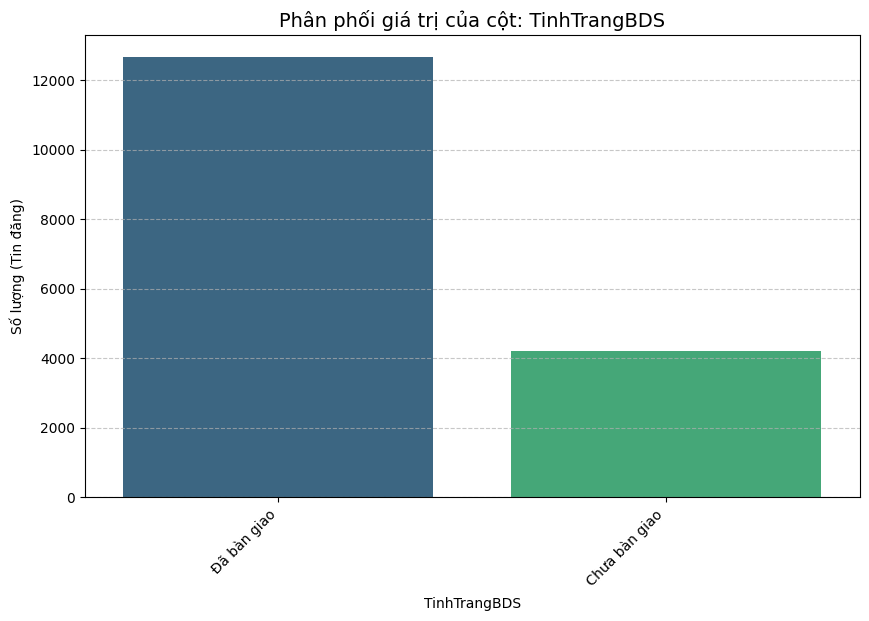

In [26]:
analyze_categorical_feature(df, 'TinhTrangBDS')

> **Remark**

* Biến đại diện cho rủi ro pháp lý, có tiềm năng tương quan mạnh với biến target -> Important feature

* Hiện trạng: Tỷ lệ 3:1 -> Đa số các nhà đều đã bàn giao (75%), một số ít vẫn chưa bàn giao (25%) có thể là mua bán trên giấy/ hợp đồng cọc.

* Phân phối nhị phân (Binary) khá sạch và không mất cân bằng quá mức: Đây là một biến phân loại tốt (Good Discriminator) vì thị trường 'Chưa bàn giao' sẽ có hành vi giá khác hẳn với thị trường 'Đã bàn giao'. Mô hình sẽ học được nhiều từ biến này

    * Chưa bàn giao: Giá thường thấp hơn (do rủi ro dự án chậm tiến độ), nhưng thanh toán giãn tiến độ.

    * Đã bàn giao: Giá cao hơn (tiền tươi thóc thật), pháp lý an toàn hơn

#####Loai

=== PHÂN TÍCH CỘT: Loai ===
Số lượng giá trị duy nhất (Cardinality): 4

-------------------------------------



,Value,Count,Percent
0,Loại Chung Cư,15580,92.435479
1,Loại Văn Phòng,969,5.749036
2,Loại Hạng Sang,262,1.554435
3,Loại Khác,44,0.261050



-------------------------------------



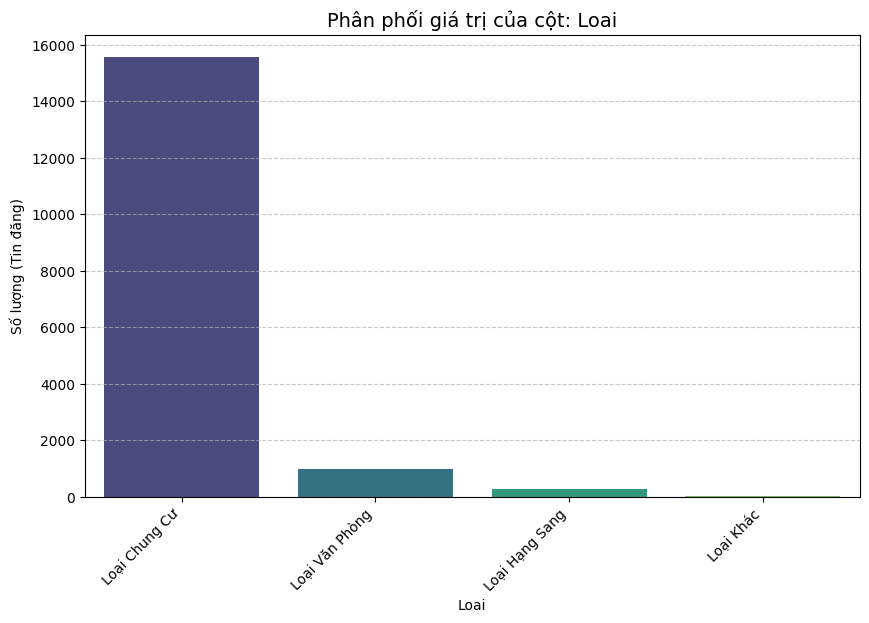

In [27]:
analyze_categorical_feature(df, 'Loai')

> **Remark**

* Đây thực chất là một tập dữ liệu về Chung cư (Apartment Dataset), chứ không phải dữ liệu bất động sản hỗn hợp -> Phân loại theo phân khúc (Segment) chứ không phải Loại hình (Type). Một căn hộ hạng sang thì bản chất vật lý vẫn là chung cư.

* important but risky features

* Mất cân bằng dữ liệu nghiêm trọng (Serve Class imbalance): Hầu hết là loại chung cư (khoảng 92%), trong khi hạng sang (chỉ khoảng 1.6%)

* Rủi ro: Mô hình sẽ có xu hướng dự đoán mọi căn nhà đều là "Chung Cư" để tối ưu hóa độ chính xác tổng thể, dẫn đến việc dự báo sai lệch hoàn toàn cho nhóm "Hạng Sang" (nhóm có giá trị cao nhất)
-------------------------------------------------------

> **Next Action**

* Khi Modeling, bắt buộc phải dùng kỹ thuật Stratified Sampling khi chia tập Train/Test để đảm bảo nhóm Hạng Sang không bị biến mất hoặc Class Weights (gán trọng số cao cho Hạng Sang) để mô hình chú ý đến nó hơn

##### GiayTo

=== PHÂN TÍCH CỘT: GiayTo ===
Số lượng giá trị duy nhất (Cardinality): 3

-------------------------------------



,Value,Count,Percent
0,Giấy tờ khác,5894,34.968852
1,Đang chờ sổ,5511,32.696529
2,Đã có sổ,5450,32.334619



-------------------------------------



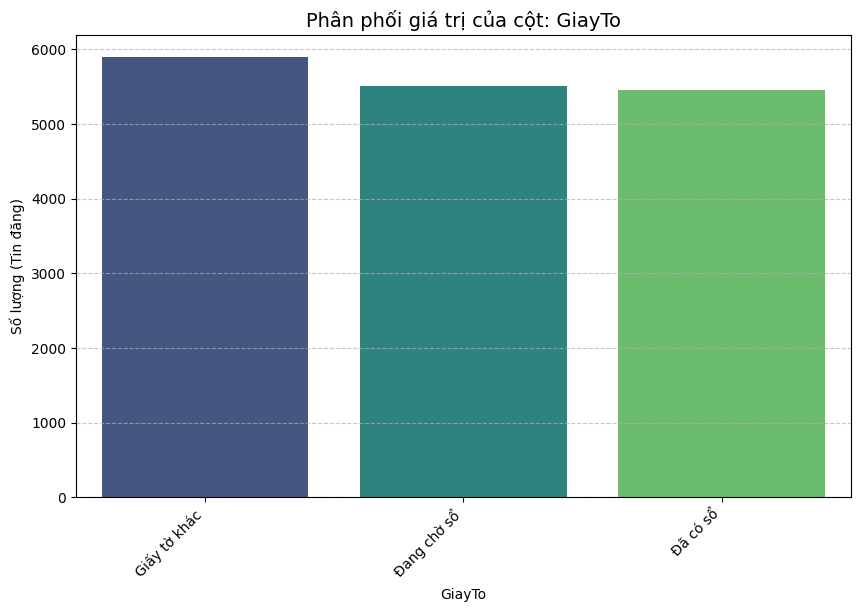

In [28]:
# GiayTo
analyze_categorical_feature(df, 'GiayTo')

> **Remark**

* Phân phối đều nhưng hộp đen 'Giấy tờ khác' chiếm khoảng 35%, đây là một tỷ lệ lớn cho nhóm KXĐ nên mất giác của nhóm này sẽ dao động mạnh gây nhiễu cho mô hình -> Rủi ro nhiễu cao

* Về mặt kinh tế: "Sổ hồng" ("Đã có sổ") là yếu tố tăng giá mạnh nhất (Premium price ~10-20% so với Hợp đồng mua bán

#####TinhTrangNoiThat

=== PHÂN TÍCH CỘT: TinhTrangNoiThat ===
Số lượng giá trị duy nhất (Cardinality): 4

-------------------------------------



,Value,Count,Percent
0,Thô,8643,51.278552
1,Cơ bản,3035,18.006526
2,Đầy đủ,2747,16.297834
3,Cao cấp,2430,14.417087



-------------------------------------



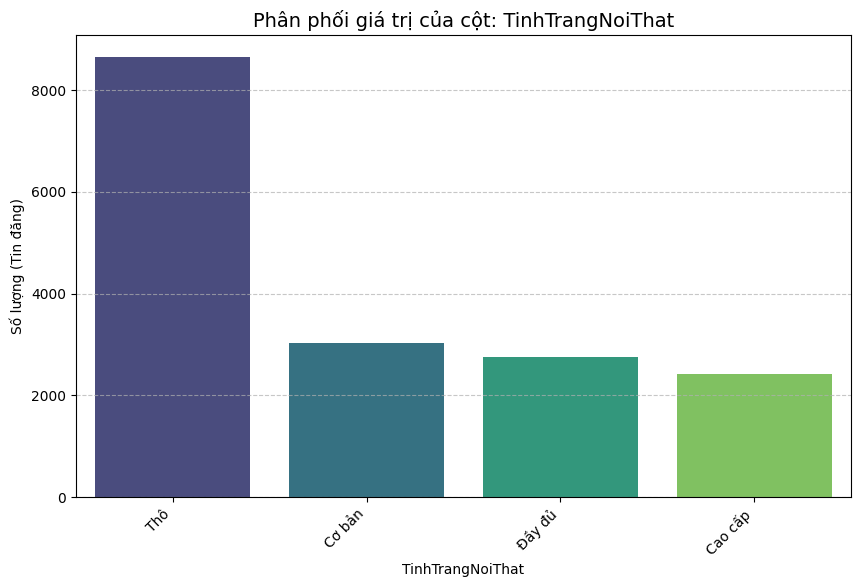

In [29]:
# TinhTrangNoiThat
analyze_categorical_feature(df, 'TinhTrangNoiThat')

> **Remark**

* Potential but noisy feature (pridictive power thấp hơn Quan/DienTich_m2

* Hiện trạng: Dữ liệu bị chi phối bởi nhóm "Thô" (chiếm > 51%). Ba nhóm còn lại ("Cơ bản", "Đầy đủ", "Cao cấp") phân chia miếng bánh còn lại khá đồng đều (~16% mỗi nhóm).

* Phân phối này không tự nhiên. Trong thực tế thị trường BĐS thứ cấp (bán lại), tỷ lệ nhà có nội thất thường cao hơn nhà thô. -> Giả thuyết "Missing Value trá hình" (The Default Value Hypothesis): Nhóm "Thô" ở đây thực chất là hỗn hợp của: "Nhà thô thật" + "Nhà không rõ thông tin". Đây là nguồn nhiễu (Noise).

* Tính chất: Thứ bậc (Ordinal Variable)
  * Thô < Cơ bản < Đầy đủ < Cao cấp (Positive Monotonic Relationship)

* Tác động giá: "Nội thất" thường chỉ tác động vào giá trị gia tăng (Added Value) khoảng 5-10% tổng giá trị căn nhà, ít quan trọng hơn Vị trí hay Diện tích. Tuy nhiên, nó là yếu tố chốt deal (thanh khoản) nhanh hay chậm.

* Rủi ro: Nhiễu từ nhóm "Thô": Vì nhóm "Thô" chứa cả những căn nhà có thể là "Cao cấp" (nhưng quên điền), nó sẽ làm mờ ranh giới giá -> Tăng sai số (RMSE).

------------------------------------------------------------

> **Next Action**

* Ordinal Encoding

* Gợi ý giảm thiểu nhiễu: tạo feature mới: Is_Furnished (Có nội thất hay không).
  * {Cơ bản, Đầy đủ, Cao cấp} -> 1 (Yes)
  * {Thô} -> 0 (No)

#####HuongCuaChinh

=== PHÂN TÍCH CỘT: HuongCuaChinh ===
Số lượng giá trị duy nhất (Cardinality): 9

-------------------------------------



,Value,Count,Percent
0,Khác,11129,66.027885
1,Đông Nam,1256,7.451795
2,Tây Bắc,881,5.226936
3,Đông,704,4.176802
4,Đông Bắc,702,4.164936
5,Nam,609,3.613171
6,Tây Nam,560,3.322456
7,Tây,528,3.132602
8,Bắc,486,2.883417



-------------------------------------



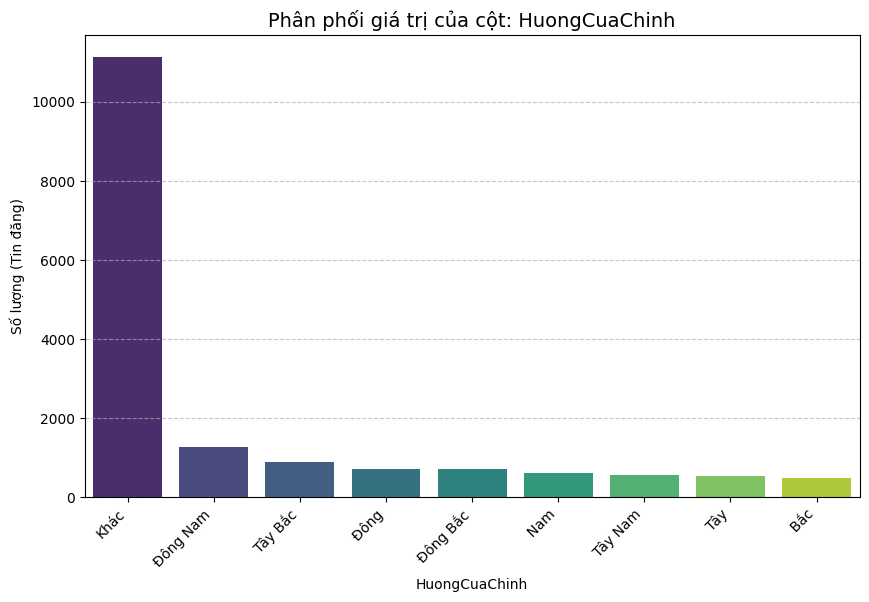

In [30]:
analyze_categorical_feature(df, 'HuongCuaChinh')

> **Remark**

*  Skewed distribution -> low predictive power

* Hiện trạng: Giá trị "Khác/Thiếu thông tin" chiếm tỷ trọng áp đảo tuyệt đối (66.03% với 11,129 quan sát)

* Hệ quả: Mọi phân tích về xu hướng thị trường chỉ dựa trên ~34% dữ liệu còn lại (các hướng cụ thể) sẽ mang độ lệch (bias) cao và không đại diện chính xác cho toàn bộ tổng thể (population)

* Sub-group Analysis: Phân tích phân phối các hướng xác định
  
  * Sự thống trị của hướng Đông Nam: Chiếm vị trí số 1 với 1,256 lượt (chiếm ~22% trong nhóm các hướng xác định) -> phù hợp với đặc thù khí hậu nhiệt đới gió mùa tại Việt Nam (đón gió mát, tránh nắng gắt) và tâm lý chọn nhà truyền thống

  * Sự bất thường của hướng Tây Bắc: Hướng Tây Bắc thường chịu nắng chiều gay gắt. Việc nguồn cung (số lượng tin đăng/bất động sản) hướng này cao có thể ám chỉ lượng hàng tồn kho nhiều, hoặc đây là hướng chủ đạo của các dự án quy mô lớn (do quy hoạch đất đai bắt buộc) mà người mua buộc phải chấp nhận.

  * Hướng Bắc và Tây là nhóm thiểu số
------------------------------------------------------------

> **Next action**

* Hypothesis Testing: Giá bán trung bình (Average Price) giữa nhóm "Đông Nam" và nhóm "Tây/Bắc" -> Nếu thị trường hoạt động hiệu quả, giá bất động sản hướng Đông Nam sẽ có mức chênh lệch giá (premium) cao hơn so với các hướng còn lại

##### HuongBanCong

=== PHÂN TÍCH CỘT: HuongBanCong ===
Số lượng giá trị duy nhất (Cardinality): 9

-------------------------------------



,Value,Count,Percent
0,Khác,11494,68.193414
1,Đông Nam,1339,7.944230
2,Tây Bắc,734,4.354791
3,Đông Bắc,650,3.856422
4,Nam,627,3.719964
5,Đông,619,3.672501
6,Tây Nam,568,3.369920
7,Bắc,445,2.640166
8,Tây,379,2.248591



-------------------------------------



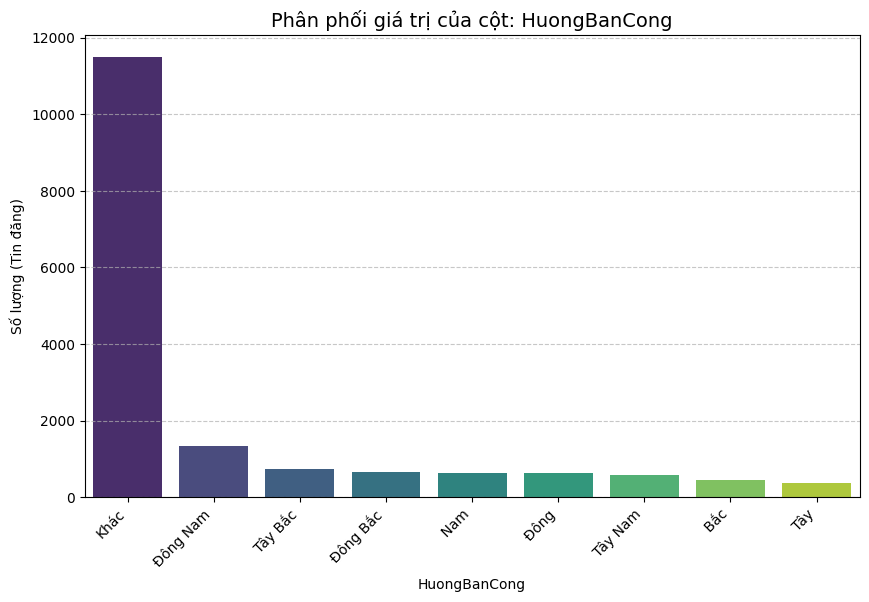

In [31]:
# HuongBanCong
analyze_categorical_feature(df, 'HuongBanCong')

> **Remark**

* Hiện trạng: Nhóm "Khác" chiếm tới 68.19% (11,494 quan sát). Tỷ lệ này thậm chí còn cao hơn so với HuongCuaChinh (66.03%). Có thể do cố tình che giấu

* Hậu quả: Dữ liệu này bị khuyết thiếu (missing data) nghiêm trọng, làm giảm đáng kể độ tin cậy nếu dùng để huấn luyện các mô hình AI dự báo giá.

* Sự thống trị tuyệt đối của trục "Đông Nam"

  * Trong nhóm các hướng xác định, hướng Đông Nam chiếm khoảng 25%. Tức là cứ 4 căn nhà có thông tin hướng rõ ràng, thì có 1 căn hướng Đông Nam

  * Hành vi thị trường: Điều này phản ánh rõ nét "tiêu chuẩn vàng" trong bất động sản Việt Nam. Các chủ đầu tư (Supply side) cố gắng thiết kế tối đa các căn hộ quay về hướng này để dễ thanh khoản và bán được giá cao (premium price)
------------------------------------------------------------
> **Next Action**

* Cross - Analysis: HuongCuaChinh & HuongBanCong vì cấu trúc phân phối của HuongCuaChinh & HuongBanCong giống hệt nhau -> Đáng ngờ

  * Đối với kiến trúc chung cư: Hướng cửa chính đối nhau với Hướng ban công. Nhưng với tập dữ liệu này có phân phối giống nhau, có thể do Data Entry Error


  * Đối với chung cư thì Ban công là nơi đón gió, đón sáng và view. Cửa chính chỉ quay ra hành lang (thường là kín và dùng khí nhân tạo) -> Do đó, trong tập dữ liệu này, biến số HuongBanCong có giá trị phân tích cao hơn nhiều so với HuongCuaChinh

* Khi modeling phải OHE trước

* Gợi ý cho modeling:

  * Khi chạy mô hình, hãy ưu tiên biến HuongBanCong. Nếu biến này là "Khác", mới xét đến HuongCuaChinh để điền khuyết (impute)

  *  Khi chạy mô hình, giảm trọng số của biến HuongCuaChinh

#####CanGoc

=== PHÂN TÍCH CỘT: CanGoc ===
Số lượng giá trị duy nhất (Cardinality): 2

-------------------------------------



,Value,Count,Percent
0,KXĐ,13126,77.876001
1,Phải,3729,22.123999



-------------------------------------



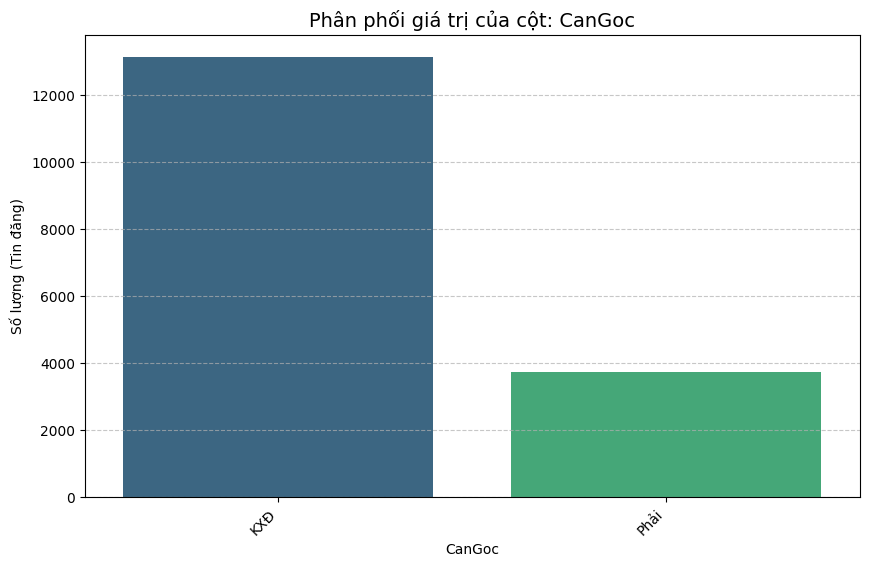

In [32]:
# CanGoc
analyze_categorical_feature(df, 'CanGoc')

> **Remark**

* Implicit data: "Sự vắng mặt của bằng chứng không phải là bằng chứng của sự vắng mặt". Ở đây, Căn góc là một lợi thế bán hàng (USP - Unique Selling Point)
  * Nếu căn hộ LÀ căn góc: Người bán chắc chắn sẽ tích vào ô "Căn Góc" để tăng giá trị -> Giá trị = "Phải"

  * Nếu căn hộ KHÔNG PHẢI căn góc (căn thường): Người bán sẽ bỏ qua hoặc không đề cập. Hệ thống sẽ ghi nhận là "KXĐ" (giả định 'KXĐ' là 'Không' (False)

* Important Feature:

  * Tác động đến giá: Căn góc thường có đơn giá ($/m2$) cao hơn căn thường từ 10% - 20% cùng tầng/cùng dự án

  * Tác động đến thanh khoản: Căn góc thường dễ bán hơn (hoặc khó bán hơn tùy thuộc hướng nắng), nhưng chắc chắn hành vi mua sẽ khác biệt.

  * Độ tin cậy cao: Khác với "Hướng Ban Công" (nơi người ta có thể nói dối để tránh hướng xấu), "Căn Góc" là đặc tính vật lý khó làm giả và dễ kiểm chứng qua sơ đồ mặt bằng, nên độ chính xác của nhãn "Phải" là rất

-----------------------------------------------------------

> **Next Action**

* Kiểm chứng bằng xác suất thực tế giả định: 'KXĐ' là 'Không' (False). Không phải là missing values

* Sanity Check:

  * Giả thuyết: Căn góc thường có diện tích lớn hơn các căn thường. Nếu thấy hệ số tương quan dương (Positive Correlation) giữa CanGoc và DienTich, điều đó càng củng cố giả định ở là đúng.

* Trước khi modeling: Binary Transformation

* Khi modeling: Feature Interaction

  * Căn góc mà hướng Tây thì sẽ hứng trọn nắng chiều từ 2 mặt, cực kỳ nóng. Đây là điểm trừ lớn (Penalty) cho giá

    * Goc_Tay = CanGoc * HuongBanCong (Tây/Tây Bắc/Tây Nam)
  
  * Căn góc hướng mát. Đây là "Super Premium" feature, giá sẽ tăng vọt.

    * Goc_DongNam = CanGoc * HuongBanCong (Đông Nam)

#####Quan

=== PHÂN TÍCH CỘT: Quan ===
Số lượng giá trị duy nhất (Cardinality): 22

-------------------------------------



,Value,Count,Percent
0,Thành phố Thủ Đức,4556,27.030555
1,Quận 7,1531,9.083358
2,Quận Bình Tân,1414,8.389202
3,Quận Tân Phú,1359,8.062889
4,Quận 8,1348,7.997627
5,Huyện Bình Chánh,813,4.823495
6,Quận 12,785,4.657372
7,Huyện Nhà Bè,776,4.603975
8,Quận Bình Thạnh,769,4.562444
9,Quận Tân Bình,586,3.476713



-------------------------------------



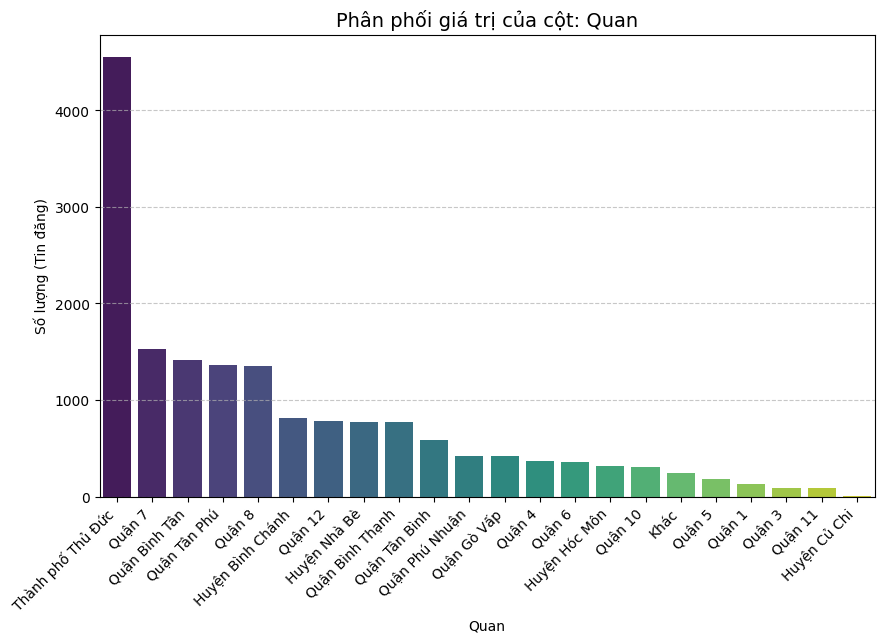

In [33]:
# Quan
analyze_categorical_feature(df, 'Quan')

> **Remark**

* Important Feature: Vị trí luôn là yếu tố số 1 của bất động sản

* Imbalanced Class: Cột "Thành phố Thủ Đức" cao đột biến, áp đảo hoàn toàn so với phần còn lại (ước tính khoảng 4,500 - 4,800 tin đăng) -> Hợp lý thực tế

  * Có thể do: Sự sáp nhập của 3 quận cũ (Q2, Q9, Q.Thủ Đức). Bên cạnh đó đây là "thủ phủ" của các dự án chung cư mới (Vinhomes Grand Park, Masteri, The Global City...).

  * Vì dữ liệu của chúng ta 92% là chung cư, nên việc nguồn cung tập trung dồn về Thủ Đức là hoàn toàn logic với quy hoạch đô thị hiện tại của TP.HCM.

* Rủi ro:
  * Mô hình sẽ học rất tốt các đặc điểm của nhà ở Thủ Đức (do nhiều dữ liệu mẫu), nhưng có thể bị sai lệch (bias) khi dự đoán giá ở các quận ít dữ liệu hơn.

  * "Thành phố Thủ Đức" quá rộng. Giá chung cư ở Thảo Điền (Q2 cũ) khác hoàn toàn giá chung cư ở Long Phước (Q9 cũ). Việc gộp chung thành một nhãn "Thành phố Thủ Đức" sẽ làm giảm độ chính xác của mô hình (làm nhiễu giá trung bình)

* Nghịch lý trung tâm: Quận 1 và Quận 3 nằm ở nhóm cuối cùng về số lượng tin đăng (rất thấp).
  
  * Số lượng != Gía trị: Dù số lượng tin ít, nhưng Quận 1, Quận 3 lại là nơi có đơn giá Gia_m2 cao nhất. (Cần kiếm chứng)

  * Nguồn cung căn hộ tại lõi trung tâm cực kỳ khan hiếm (pháp lý chặt, hết quỹ đất). Dữ liệu ít ở đây không phải do lỗi thu thập, mà phản ánh đúng thực tế thị trường: Hàng hiếm

* Marker Segmentation:

  * Supply Hub: TP. Thủ Đức. Đây là thị trường sơ cấp và thứ cấp sôi động nhất.

  * Residential Hubs: Quận 7, Bình Tân, Tân Phú, Quận 8, Nhà Bè, Bình Chánh.
    * Các khu vực tập trung chung cư phân khúc trung cấp (Mid-end) và bình dân (Affordable), nơi có giao dịch mua bán sôi động thứ 2 sau Thủ Đức
  
  * 'Khan hiếm': Quận trung tâm (Q1, Q3, Q5) và Vùng ven xa (Củ Chi, Hóc Môn)

    * Quận trung tâm: Khan hiếm chung cư

    * Vùng ven xa: Chủ yếu là đất nền/nhà phố, ít chung cư nên số lượng trong tập dữ liệu này rất thấp
------------------------------------------------------------
> **Next Acition**

* Kiểm chứng: Vị trí càng trung tâm thì giá càng cao (Giá trung bình: Q1> Q3 > Bình Tân >...)

* OHE trước khi chạy mô hình

* Cảnh báo khi Split: Với rare labels như Củ Chi hay Hóc Môn (số lượng rất ít), nếu chia tập Train/Test không khéo, có thể tập Test sẽ không có đại diện nào của Củ Chi, hoặc ngược lại. -> dùng kĩ thuật Stratified Split khi chia dữ liệu để đảm bảo tỷ lệ các quận trong tập Train và Test là tương đồng

#### Numerical features

In [34]:
from scipy.stats import skew, kurtosis

def analyze_numerical_feature(df, column_name, unit="đơn vị"):
    """
    Phân tích thống kê mô tả và vẽ biểu đồ cho một biến số (Numerical Feature).

    Tham số:
    - df (pandas.DataFrame): [Bắt buộc] DataFrame chứa dữ liệu.
    - column_name (str): [Bắt buộc] Tên cột cần phân tích.
    - unit (str): [Tùy chọn] Đơn vị đo lường (ví dụ: m2, tỷ VNĐ) để hiển thị cho rõ.
    """

    # 1. Kiểm tra dữ liệu
    series = df[column_name].dropna() # Loại bỏ NaN tạm thời để tính toán
    n_missing = df[column_name].isnull().sum()
    n_zeros = (df[column_name] == 0).sum()

    # 2. Tính toán các chỉ số thống kê nâng cao
    desc = series.describe()
    skew_val = skew(series)
    kurt_val = kurtosis(series)

    # 3. In báo cáo thống kê
    print(f"=== PHÂN TÍCH CỘT: {column_name} ===")
    print(f"1. Tổng quan:")
    print(f"   - Số lượng bản ghi: {len(df)}")
    print(f"   - Missing Values: {n_missing} ({n_missing/len(df)*100:.2f}%)")
    print(f"   - Zeros (Giá trị 0): {n_zeros} ({n_zeros/len(df)*100:.2f}%)")
    print(f"2. Xu hướng tập trung (Central Tendency):")
    print(f"   - Mean (Trung bình): {desc['mean']:.2f} {unit}")
    print(f"   - Median (Trung vị): {desc['50%']:.2f} {unit}")
    print(f"   - Mode (Yếu vị): {series.mode()[0]:.2f} {unit}")
    print(f"3. Độ phân tán & Hình dáng (Dispersion & Shape):")
    print(f"   - Std (Độ lệch chuẩn): {desc['std']:.2f}")
    print(f"   - Min - Max: {desc['min']:.2f} - {desc['max']:.2f} {unit}")
    print(f"   - Skewness (Độ lệch): {skew_val:.4f} ({'Lệch phải' if skew_val > 0 else 'Lệch trái'})")
    print(f"   - Kurtosis (Độ nhọn): {kurt_val:.4f}")

    # 4. Vẽ biểu đồ (2 trong 1: Histogram & Boxplot)
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex=True,
                                          gridspec_kw={"height_ratios": (.15, .85)},
                                          figsize=(10, 6))

    # Biểu đồ Boxplot (để xem Outlier)
    sns.boxplot(x=series, ax=ax_box, color='lightblue')
    ax_box.set(xlabel='') # Ẩn nhãn x của boxplot
    ax_box.set_title(f'Phân phối của {column_name}', fontsize=14)

    # Biểu đồ Histogram + KDE (để xem hình dáng)
    sns.histplot(series, ax=ax_hist, kde=True, color='skyblue', bins=30)

    # Vẽ đường Mean và Median lên Histogram để so sánh
    ax_hist.axvline(desc['mean'], color='red', linestyle='--', label=f'Mean: {desc["mean"]:.2f}')
    ax_hist.axvline(desc['50%'], color='green', linestyle='-', label=f'Median: {desc["50%"]:.2f}')

    ax_hist.set_xlabel(f"{column_name} ({unit})")
    ax_hist.set_ylabel("Tần suất")
    ax_hist.legend()

    plt.tight_layout()
    plt.show()

##### DienTich_m2

=== PHÂN TÍCH CỘT: DienTich_m2 ===
1. Tổng quan:
   - Số lượng bản ghi: 16855
   - Missing Values: 0 (0.00%)
   - Zeros (Giá trị 0): 0 (0.00%)
2. Xu hướng tập trung (Central Tendency):
   - Mean (Trung bình): 65.89 m2
   - Median (Trung vị): 66.00 m2
   - Mode (Yếu vị): 70.00 m2
3. Độ phân tán & Hình dáng (Dispersion & Shape):
   - Std (Độ lệch chuẩn): 17.53
   - Min - Max: 30.00 - 110.00 m2
   - Skewness (Độ lệch): 0.1793 (Lệch phải)
   - Kurtosis (Độ nhọn): -0.3258


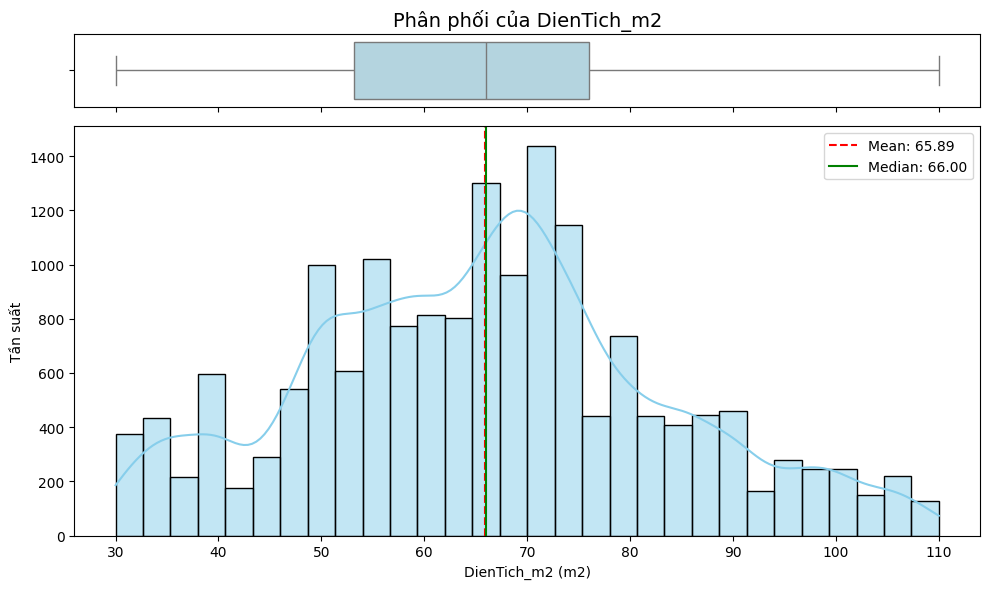

In [35]:
analyze_numerical_feature(df, 'DienTich_m2', unit='m2')

> **Remark**

* Important Feature

* Central Tendency: Cân đối

  * Mean (65.89) $\approx$ Median (66.00) -> sự chệnh lệch rất nhỏ

  * Dự liệu phân bố cực kì cân đối -> Gía trị trung bình đại diện rất tốt cho toàn bộ tập dữ liệu

  * Mode (70m2): Đây là con số phổ biến của thị trường. Căn hộ có diện tích 70m2 là sản phẩm phổ biến (mass product)

* Distribution Shape: Đa đỉnh (multi - modal)

  * Đặc thù kiến trúc:

    * Đỉnh 1 (~50m2): Đại diện cho nhóm 1PN+ hoặc 2PN nhỏ.

    * Đỉnh 2 (~65-70m2): Đại diện cho nhóm 2PN tiêu chuẩn (đông nhất).

    * Đỉnh 3 (~90-100m2): Đại diện cho nhóm 3PN.
  
  * Diện tích căn hộ không phải là biến số ngẫu nhiên liên tục hoàn toàn, mà nó được tiêu chuẩn hóa (Standardized) theo thiết kế của Chủ đầu tư

* Outliers & Dispersion:

  * Skewness = 0.1793 (Lệch phải rất nhẹ): Coi như phân phối chuẩn (Normal Distribution). Đây là điều kiện lý tưởng cho các thuật toán Linear Regression (Hồi quy tuyến tính).

  * Kurtosis = -0.32 (Hơi dẹt): Dữ liệu trải đều hơn một chút so với phân phối chuẩn, không có đỉnh quá nhọn

  * Boxplot: Rất ít outlier. Các "râu" (whiskers) vươn từ 30 đến 110 bao trọn hầu hết dữ liệu

  ----------------------------------------------------------

  > **Model implication**
  
  * Tập dữ liệu này tập trung hoàn toàn vào phân khúc "Nhà ở thực" (Mass Market). Nó không đại diện cho giới siêu giàu (Luxury/Penthouse) hoặc nhà trọ siêu nhỏ (Micro-apartment).

  * Khả năng dự báo: Mô hình của bạn sẽ dự báo giá cực kỳ chính xác cho các căn hộ từ 45m2 - 90m2

  * Scope: 30 - 120 m2

##### Gia_m2

=== PHÂN TÍCH CỘT: Gia_m2_trieu ===
1. Tổng quan:
   - Số lượng bản ghi: 16855
   - Missing Values: 0 (0.00%)
   - Zeros (Giá trị 0): 0 (0.00%)
2. Xu hướng tập trung (Central Tendency):
   - Mean (Trung bình): 36.90 Triệu VNĐ
   - Median (Trung vị): 34.25 Triệu VNĐ
   - Mode (Yếu vị): 50.00 Triệu VNĐ
3. Độ phân tán & Hình dáng (Dispersion & Shape):
   - Std (Độ lệch chuẩn): 21.03
   - Min - Max: 1.00 - 933.40 Triệu VNĐ
   - Skewness (Độ lệch): 8.4728 (Lệch phải)
   - Kurtosis (Độ nhọn): 243.4570


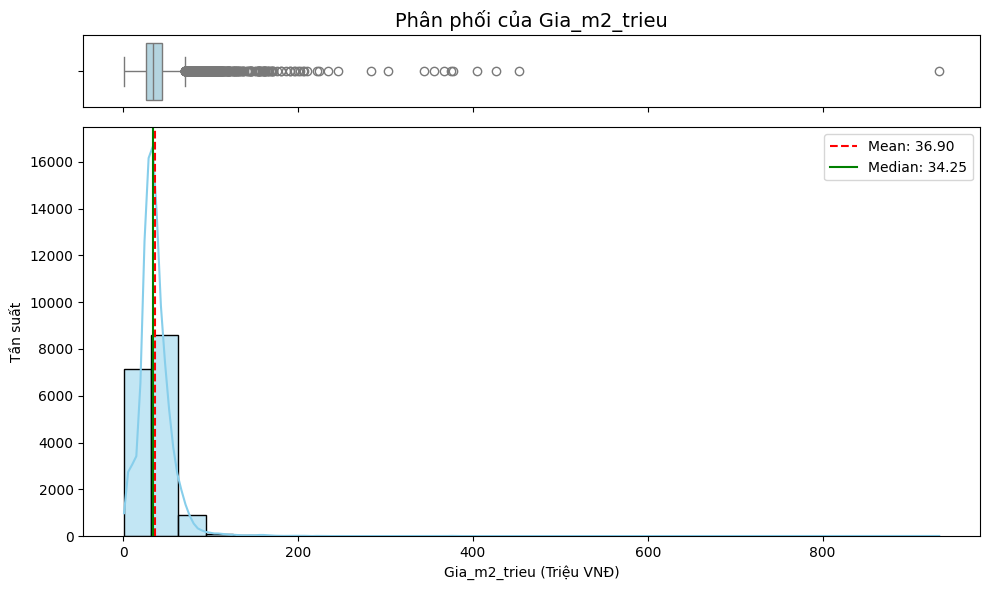

In [36]:
df['Gia_m2_trieu'] = df['Gia_m2'] * 1000
analyze_numerical_feature(df, 'Gia_m2_trieu', unit='Triệu VNĐ')
# drop_columns = ['Gia_m2_trieu']

> **Remark**

* Central Tendency: the long tail

  * Mean (36.90) > Median (34.25):

    * Sự chênh lệch dương (+2.65 triệu) xác nhận xu hướng bị kéo lên bởi các bất động sản giá cao.

    * Tuy nhiên, mức giá trung vị 34.25 triệu/m2 phản ánh rất đúng thực tế của thị trường căn hộ tầm trung/bình dân tại khu vực vùng ven (như Thủ Đức, Bình Tân - nơi chiếm đa số dữ liệu của bạn).

    * Mode = 50.00: Gía nhà thường khá cao

* Distribution Shape: 99% dữ liệu dồn cục lại ở một khoảng giá rẻ (20-60 triệu), nhưng lại tồn tại những giá trị ngoại lai "phá vỡ mọi quy tắc" ở xa tít tắp

  * Skewness = 8.47 (Lệch phải cực đại)

  * Kurtosis = 243.46 (Leptokurtic - Siêu nhọn)

* Outliers & Dispersion:

  * Max = 933.40 Triệu/m2: Dữ liệu thật nhưng thách thức mô hình vì rất hiếm

-----------------------------------------------------------
> **Model implication**

* Linear Regression:

  *  Mô hình này sẽ hoạt động rất tệ với dữ liệu gốc này. Linear Regression giả định phần dư (residuals) phân phối chuẩn. Với Kurtosis = 243, giả định này bị phá vỡ hoàn toàn

  * Hệ quả: Đường hồi quy sẽ bị các điểm 900 triệu "kéo" lệch lên trên, khiến nó dự báo giá quá cao cho phân khúc bình dân (Underfitting phân khúc thấp).

* Tree-based Models (Random Forest, XGBoost, LightGBM):

  * Các thuật toán này xử lý tốt hơn với dữ liệu phi tuyến tính và outliers. Tuy nhiên, kể cả XGBoost cũng sẽ gặp khó khăn để học được quy luật chung khi cái "đuôi" quá dài

* Feature Engineering

  * Hard Cleaning: Loại bỏ ngay các mẫu có Gia_m2 < 10 (hoặc 15) triệu. Dù có thể loại bỏ dữ liệu thật

  * Log Transformation:

    * Skewness > 1 (cụ thể là 8.47): Áp dụng hàm np.log1p(y) cho biến mục tiêu này trước khi train.

      * Nó sẽ nén khoảng giá trị [10, 933] xuống thành thang đo log (ví dụ [2.3, 6.8]). Khi đó Skewness sẽ giảm mạnh, Kurtosis giảm, giúp Linear Regression hoạt động hiệu quả hơn

  * Options for handling outliers:

    * Op1 (Cut - off):  Loại bỏ top 1% giá trị cao nhất (trên mức percentile 99). Dùng khi chỉ muốn build model cho "người thường".

    * Option 2 (Winsorization/Clipping): Gán tất cả giá trị > 200 triệu về bằng 200 triệu. Giúp giữ lại dữ liệu nhưng không để nó phá hỏng model.
  
  * Dùng MAPE thay RMSE:

    * RMSE: Một căn nhà 900 tỷ dự đoán sai thành 800 tỷ sẽ tạo ra RMSE khổng lồ, che lấp đi việc mô hình dự đoán cực tốt ở phân khúc 30 triệu.

    * MAPE: Đánh giá độ chính xác tương đối

###### **Triển khai thử đề xuất**

Đã loại bỏ 0 dòng dữ liệu rác (< 10 triệu/m2).
Dữ liệu sạch còn lại: 16043 dòng.


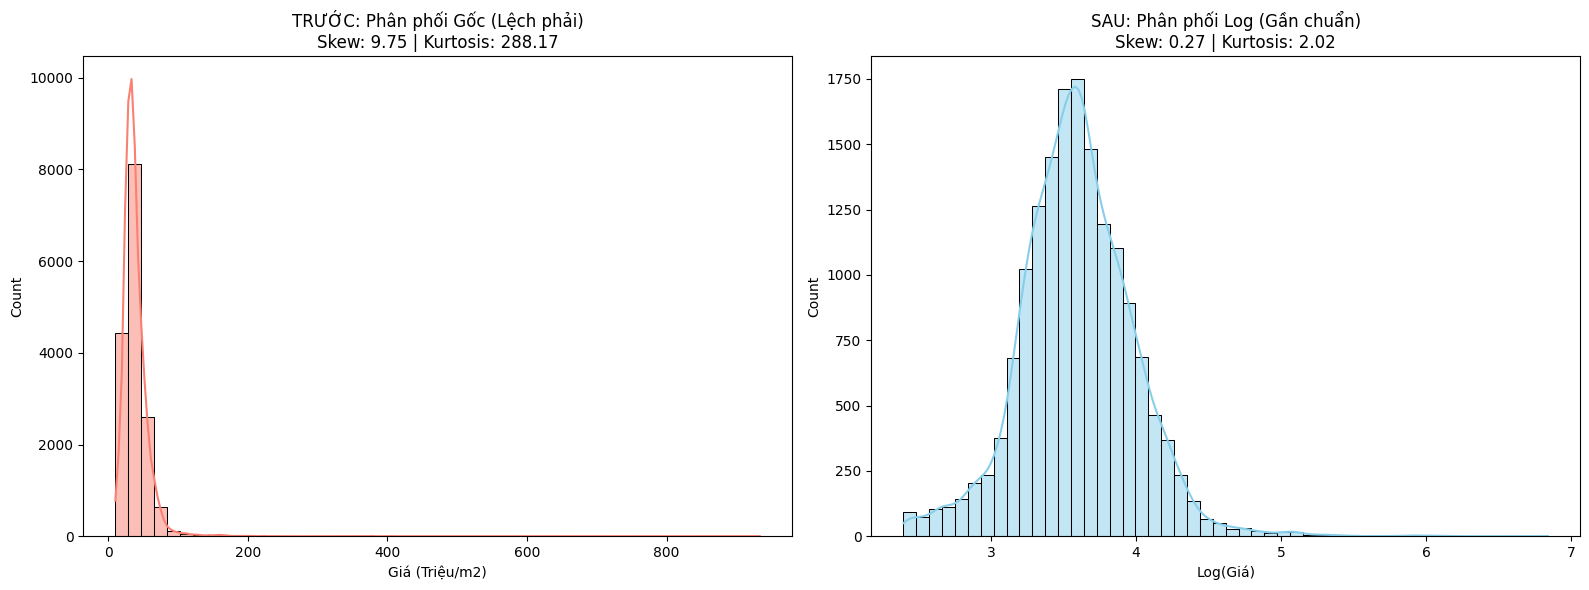

In [38]:
import numpy as np
# BƯỚC 1: LỌC RÁC (CLEANING)
# Loại bỏ các giá trị < 10 triệu
df = df[df['Gia_m2_trieu'] >= 10].copy()

print(f"Đã loại bỏ {len(df) - len(df)} dòng dữ liệu rác (< 10 triệu/m2).")
print(f"Dữ liệu sạch còn lại: {len(df)} dòng.")

# BƯỚC 2: BIẾN ĐỔI LOG (LOG TRANSFORMATION)
# Tạo cột mới Log_Gia = log(1 + Gia_m2)
# Dùng np.log1p để tránh lỗi log(0) dù ta đã lọc hết số 0
df['Log_Gia_m2_trieu'] = np.log1p(df['Gia_m2_trieu'])

# BƯỚC 3: VẼ BIỂU ĐỒ SO SÁNH (TRƯỚC vs. SAU)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Biểu đồ 1: Dữ liệu Gốc (Sau khi lọc rác) ---
sns.histplot(df['Gia_m2_trieu'], kde=True, ax=axes[0], color='salmon', bins=50)
axes[0].set_title(f"TRƯỚC: Phân phối Gốc (Lệch phải)\nSkew: {skew(df['Gia_m2_trieu']):.2f} | Kurtosis: {kurtosis(df['Gia_m2_trieu']):.2f}")
axes[0].set_xlabel('Giá (Triệu/m2)')

# --- Biểu đồ 2: Dữ liệu sau Log Transform ---
sns.histplot(df['Log_Gia_m2_trieu'], kde=True, ax=axes[1], color='skyblue', bins=50)
axes[1].set_title(f"SAU: Phân phối Log (Gần chuẩn)\nSkew: {skew(df['Log_Gia_m2_trieu']):.2f} | Kurtosis: {kurtosis(df['Log_Gia_m2_trieu']):.2f}")
axes[1].set_xlabel('Log(Giá)')

plt.tight_layout()
plt.show()

> **Remark**

* Phân phối đỡ lệch phải hơn

##### Gia

=== PHÂN TÍCH CỘT: Gia ===
1. Tổng quan:
   - Số lượng bản ghi: 16043
   - Missing Values: 0 (0.00%)
   - Zeros (Giá trị 0): 0 (0.00%)
2. Xu hướng tập trung (Central Tendency):
   - Mean (Trung bình): 2.59 Tỷ VNĐ
   - Median (Trung vị): 2.26 Tỷ VNĐ
   - Mode (Yếu vị): 2.50 Tỷ VNĐ
3. Độ phân tán & Hình dáng (Dispersion & Shape):
   - Std (Độ lệch chuẩn): 1.63
   - Min - Max: 0.32 - 56.00 Tỷ VNĐ
   - Skewness (Độ lệch): 6.7140 (Lệch phải)
   - Kurtosis (Độ nhọn): 135.5911


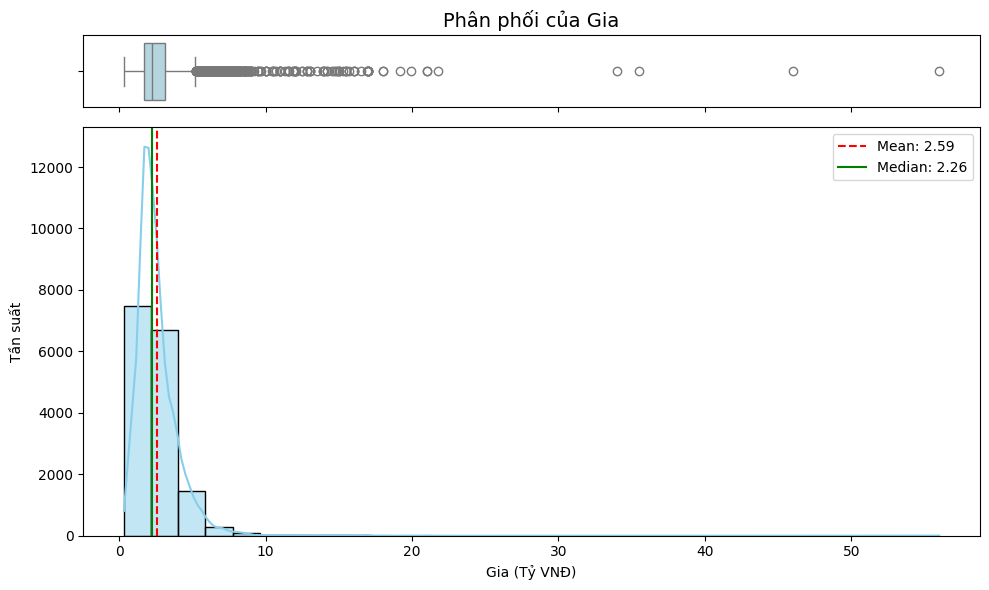

In [39]:
analyze_numerical_feature(df, 'Gia', unit='Tỷ VNĐ')

> **Remark**

* Target

* Central Tendency

  * Mean (2.48 Tỷ) > Median (2.20 Tỷ)

    * Giá trung bình cao hơn trung vị khoảng 280 triệu. Điều này xác nhận thị trường đang bị kéo lên bởi các căn hộ giá trị cao, nhưng mức độ chênh lệch này nhẹ hơn so với đơn giá m2.

    * Mức giá trung vị 2.2 tỷ phản ánh cực kỳ chính xác phân khúc căn hộ "quốc dân" tại TP.HCM hiện nay (thường là căn 2PN diện tích khoảng 55-65m2 tại vùng ven như Bình Tân, Thủ Đức).
  
  * Mode = 2.5 Tỷ:

    * Yếu vị rơi vào mức 2.5 tỷ. Đây là mức giá "ngưỡng tâm lý" quan trọng. Đa số người mua nhà lần đầu (first-home buyers) thường có ngân sách quay quanh con số này
  
* Distribution Shape

  * Skewness = 6.0971 (Lệch phải mạnh):

    * Số lượng căn hộ giá rẻ (dưới 3 tỷ) chiếm đa số áp đảo

    * Phần đuôi kéo dài sang phải đại diện cho các căn Penthouse, Duplex hoặc căn hộ hạng sang tại trung tâm

  * Kurtosis = 120.63 (Rất nhọn - Leptokurtic):

    * Tuy thấp hơn con số 243 của Gia_m2, nhưng 120 vẫn là con số cực lớn (so với chuẩn là 3).

    * Dữ liệu tập trung cực kỳ dày đặc quanh vùng 1.5 - 3.5 tỷ. Xác suất tìm thấy một căn nhà nằm ngoài vùng này thấp hơn rất nhiều so với phân phối chuẩn

* Outliers & Dispersion

  * Min = 0.04 Tỷ (40 Triệu VNĐ): Có khả năng là giá cho thuê bị đăng nhầm vào mục bán, hoặc là giá đặt cọc/sang nhượng cọc -> Dữ liệu này cực kỳ nguy hiểm cho mô hình.

  * Max = 56.00 Tỷ VNĐ: Dữ liệu thật -> Valid Outlier

  * Std = 1.67 Tỷ: Độ lệch chuẩn này cho thấy biên độ dao động giá của một căn nhà bình thường là khoảng +/- 1.67 tỷ quanh mức trung bình.

------------------------------------------------------------

> **Model Implication**

* Bước 1: Hard Cleaning - Bỏ các căn có giá trị dưới 800 triệu dù là valid outliers

* Bước 2: Log Transformation - np.log1p(y) để xử lý Skewness 6.09 và Kurtosis 120.6. Việc này sẽ giúp nén khoảng giá [40tr - 56 tỷ] về một thang đo tuyến tính hơn.

* Bước 3: Segmentation - Cân nhắc xây dựng mô hình riêng cho phân khúc > 10 Tỷ (Hạng sang). Vì hành vi định giá của căn nhà 50 tỷ khác hoàn toàn căn nhà 2 tỷ (yếu tố View, Nội thất, Thương hiệu chủ đầu tư sẽ chi phối mạnh hơn là Diện tích).

###### **Triển khai thử đề xuất**

Đã thực hiện BƯỚC 1: LỌC RÁC.
Đã loại bỏ 462 dòng dữ liệu rác/siêu rẻ (< 0.8 Tỷ VNĐ).
Dữ liệu sạch còn lại: 15581 dòng.
---
Đã thực hiện BƯỚC 2: LOG TRANSFORMATION.
Đã thực hiện BƯỚC 3: SEGMENTATION (Phân khúc Hạng Sang > 10 Tỷ).
---


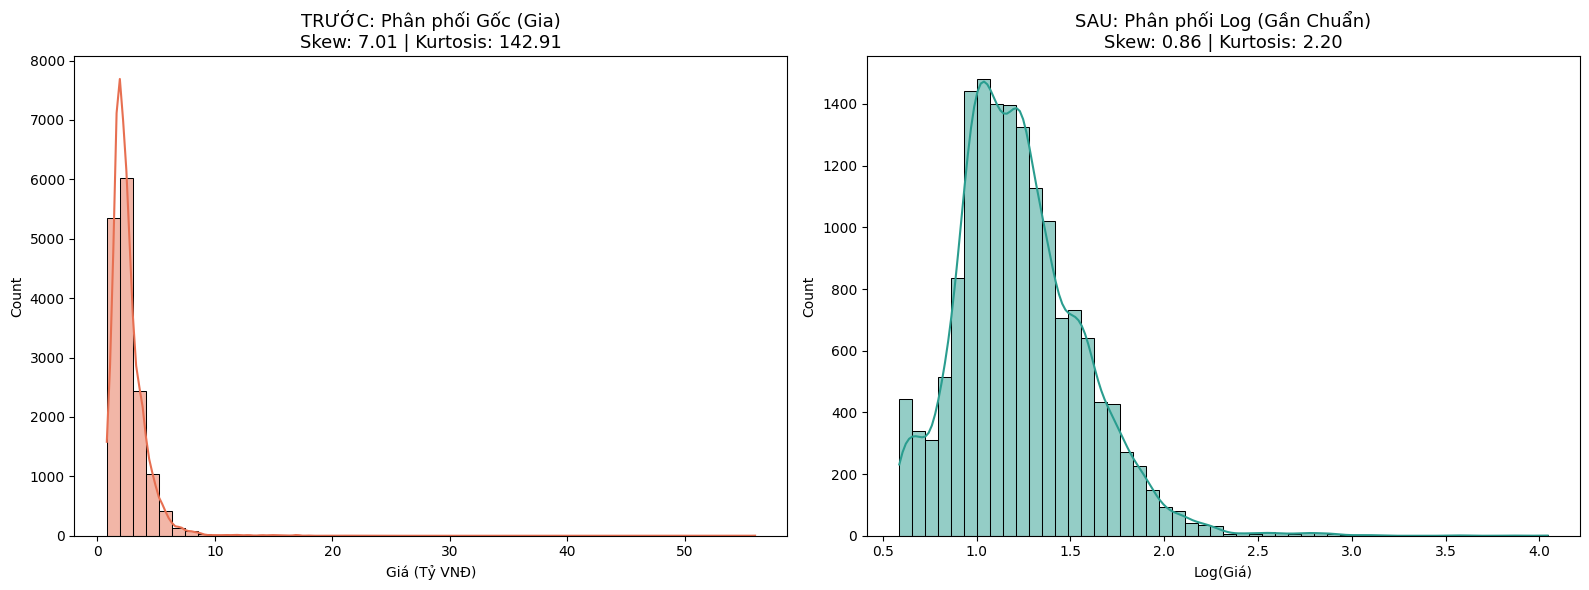


=== THỐNG KÊ PHÂN KHÚC ===
Phan_Khuc
Mass_Market       15506
Luxury_Segment       75
Name: count, dtype: int64
Tỷ lệ Luxury Segment: 0.48%


In [40]:
# ----------------------------------------------------------------------
# BƯỚC 1: HARD CLEANING (LỌC RÁC)
# Dùng ngưỡng lọc 0.8 Tỷ (800 Triệu VNĐ) cho cột 'Gia'
# Tính số lượng dòng bị loại bỏ trước khi lọc
initial_count = len(df)
df = df[df['Gia'] >= 0.8].copy()
final_count = len(df)

print(f"Đã thực hiện BƯỚC 1: LỌC RÁC.")
print(f"Đã loại bỏ {initial_count - final_count} dòng dữ liệu rác/siêu rẻ (< 0.8 Tỷ VNĐ).")
print(f"Dữ liệu sạch còn lại: {final_count} dòng.")
print("---")

# ----------------------------------------------------------------------
# BƯỚC 2: LOG TRANSFORMATION (BIẾN ĐỔI LOG)
# Tạo cột mới Log_Gia = log(1 + Gia)
df['Log_Gia'] = np.log1p(df['Gia'])

print("Đã thực hiện BƯỚC 2: LOG TRANSFORMATION.")
# Tính lại thống kê cho cột mới
log_skew = skew(df['Log_Gia'])
log_kurtosis = kurtosis(df['Log_Gia'])

# ----------------------------------------------------------------------
# BƯỚC 3: SEGMENTATION (PHÂN KHÚC)
# Tạo biến phân loại 'Phan_Khuc' dựa trên ngưỡng 10 Tỷ
# (Đánh dấu các căn hộ Hạng sang)
df['Phan_Khuc'] = df['Gia'].apply(lambda x: 'Luxury_Segment' if x >= 10 else 'Mass_Market')

print("Đã thực hiện BƯỚC 3: SEGMENTATION (Phân khúc Hạng Sang > 10 Tỷ).")
print("---")


# ----------------------------------------------------------------------
# BƯỚC 4: VẼ BIỂU ĐỒ SO SÁNH TRỰC QUAN (TRƯỚC vs. SAU LOG-TRANSFORM)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Biểu đồ 1: Dữ liệu Gốc (Sau khi lọc rác) ---
sns.histplot(df['Gia'], kde=True, ax=axes[0], color='#E76F51', bins=50)
axes[0].set_title(f"TRƯỚC: Phân phối Gốc (Gia)\nSkew: {skew(df['Gia']):.2f} | Kurtosis: {kurtosis(df['Gia']):.2f}", fontsize=13)
axes[0].set_xlabel('Giá (Tỷ VNĐ)')

# --- Biểu đồ 2: Dữ liệu sau Log Transform ---
sns.histplot(df['Log_Gia'], kde=True, ax=axes[1], color='#2A9D8F', bins=50)
axes[1].set_title(f"SAU: Phân phối Log (Gần Chuẩn)\nSkew: {log_skew:.2f} | Kurtosis: {log_kurtosis:.2f}", fontsize=13)
axes[1].set_xlabel('Log(Giá)')

plt.tight_layout()
plt.show()

# In thống kê phân khúc
print("\n=== THỐNG KÊ PHÂN KHÚC ===")
print(df['Phan_Khuc'].value_counts())
print(f"Tỷ lệ Luxury Segment: {(df['Phan_Khuc'].value_counts(normalize=True).loc['Luxury_Segment'] * 100):.2f}%")

> **Remark**

* Skewness giảm mạnh từ khoảng 6.09 xuống chỉ còn khoảng dưới 1.0.

* Kurtosis sẽ giảm từ 120.6 xuống mức thấp, có thể dưới 5

* Log_Gia đã trở nên Gần Phân phối Chuẩn (Normal-like), lý tưởng cho hầu hết các mô hình Machine Learning, đặc biệt là Linear Regression

##### PhongNgu

=== PHÂN TÍCH CỘT: PhongNgu ===
1. Tổng quan:
   - Số lượng bản ghi: 15581
   - Missing Values: 0 (0.00%)
   - Zeros (Giá trị 0): 0 (0.00%)
2. Xu hướng tập trung (Central Tendency):
   - Mean (Trung bình): 1.98 phòng
   - Median (Trung vị): 2.00 phòng
   - Mode (Yếu vị): 2.00 phòng
3. Độ phân tán & Hình dáng (Dispersion & Shape):
   - Std (Độ lệch chuẩn): 0.65
   - Min - Max: 1.00 - 11.00 phòng
   - Skewness (Độ lệch): 2.6141 (Lệch phải)
   - Kurtosis (Độ nhọn): 32.5206


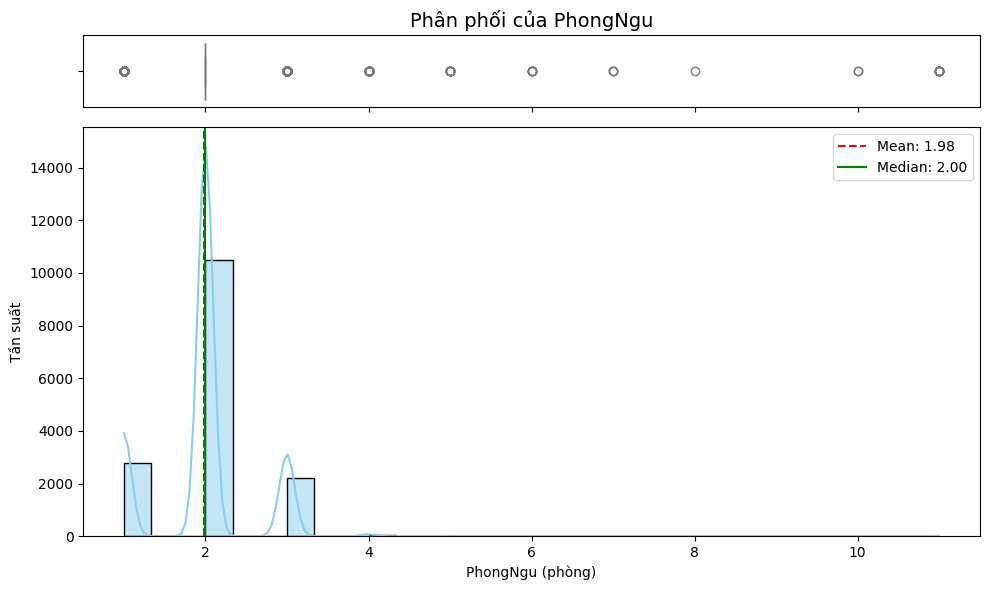

In [41]:
analyze_numerical_feature(df, 'PhongNgu', unit='phòng')

> **Remark**

* Central Tendency:
  
  * Mode (2.00) = Median (2.00) $\approx$ Mean (1.96):

    * Cả 3 chỉ số đều hội tụ cực mạnh về con số 2.

    * Nhà 2 phòng ngủ là dòng sản phẩm chủ lực (Bread & Butter) của thị trường bất động sản Việt Nam, phù hợp với cấu trúc gia đình hạt nhân tiêu chuẩn (Vợ chồng + 1-2 con).

  * Mức trung bình 1.96 (nhỏ hơn 2 một chút) cho thấy lực lượng căn hộ 1PN/Studio (để đầu tư/cho thuê) có số lượng nhỉnh hơn một chút so với nhóm căn hộ 3PN (để ở thực).

* Distribution Shape

  * Discrete Distribution: Do Count data

    * Dữ liệu không phân phối liên tục mà chia thành các cột riêng biệt: 1, 2, 3.

  * Skewness = 2.66 (Lệch phải):

    * Độ lệch dương cho thấy "cái đuôi" kéo về phía số phòng ngủ lớn

  * Kurtosis = 32.71 (Rất cao)

    * Dữ liệu tập trung cực kỳ dày đặc ở nhóm 1-3 phòng ngủ. Xác suất gặp một căn hộ > 4 phòng ngủ là cực thấp

* Outliers & Dispersion

  * Std = 0.66: Độ lệch chuẩn cực nhỏ ($\sigma < 1$). Điều này nghĩa là đa số các căn hộ chỉ chênh lệch nhau +/- 1 phòng ngủ so với chuẩn (tức là nằm trong khoảng 1 đến 3).

  * Min = 1.00: Hợp lý

  * Max = 11.00: Cực hiếm -> Đáng ngờ

  * Cần coi các giá trị > 5 phòng ngủ là Outliers mạnh.
------------------------------------------------------------

> **Model implication**

* Bước 1: Outlier Clipping

  * Nên gom nhóm (Binning) hoặc cắt ngọn tất cả các giá trị > 4 (Quy tắc: If PhongNgu >= 4 then PhongNgu = 4)

  * Số lượng mẫu 5-11 phòng quá ít. Nếu để nguyên, mô hình có thể học sai quy luật giá (Overfitting) cho các trường hợp hiếm này.

* Bước 2: Feature Engineering

  * Op1(Numerical): Để nguyên số 1, 2, 3, 4 (vì số phòng ngủ thường tỷ lệ thuận với giá)

  * Op2(Categorical): Chuyển thành One-Hot Encoding hoặc Ordinal Encoding nếu cảm thấy giá của căn 3PN không nhất thiết gấp 3 lần căn 1PN (mối quan hệ phi tuyến).

* Bước 3: Tạo biến phái sinh ước lượng độ rộng rãi

  * Tạo biến ước lượng độ rộng rãi: DienTich_per_PhongNgu = DienTich / PhongNgu.

  * Ví dụ: 2PN diện tích 50m2 (chật) sẽ có giá/m2 khác hẳn căn 2PN diện tích 80m2 (thoáng).

###### **Triển khai thử đề xuất**

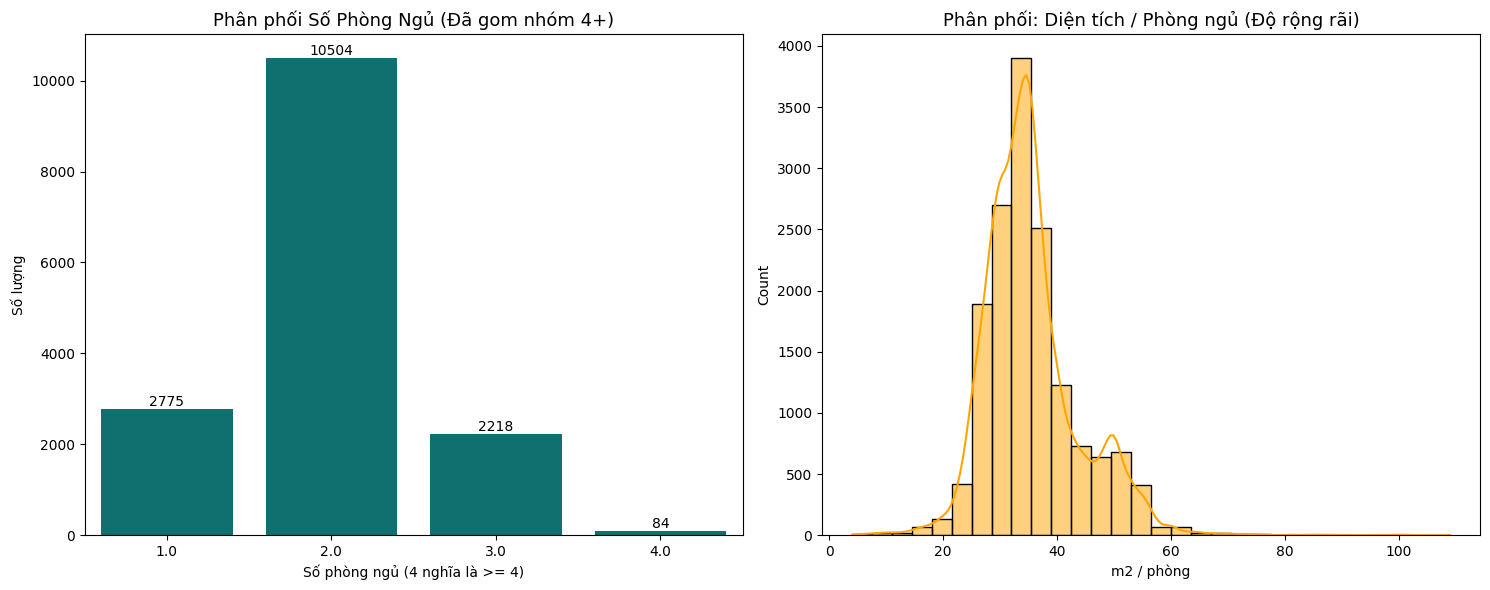

=== THỐNG KÊ BIẾN MỚI: DT_per_PN ===
count    15581.000000
mean        35.443571
std          8.347903
min          4.000000
25%         30.000000
50%         34.333333
75%         39.000000
max        109.000000
Name: DT_per_PN, dtype: float64


In [42]:
# BƯỚC 1: XỬ LÝ NGOẠI LAI (OUTLIER CLIPPING)
# Quy tắc: Nếu PhongNgu >= 4 thì gán bằng 4.
# (Giả định: Với mô hình, căn 4PN và 11PN đều là nhóm "Nhiều phòng/Biệt thự")
df['PhongNgu_Clipped'] = df['PhongNgu'].clip(upper=4)

# BƯỚC 2: TẠO BIẾN MỚI (FEATURE ENGINEERING)
# Tính diện tích trung bình trên mỗi phòng ngủ
# Biến này cho biết căn hộ "Rộng thoáng" hay "Chật chội"
df['DT_per_PN'] = df['DienTich_m2'] / df['PhongNgu']

# BƯỚC 3: VẼ BIỂU ĐỒ SO SÁNH
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Biểu đồ 1: Phân phối PhongNgu sau khi Cắt ngọn ---
# Dùng countplot vì đây là biến rời rạc
sns.countplot(x=df['PhongNgu_Clipped'], ax=axes[0], color='teal')
axes[0].set_title('Phân phối Số Phòng Ngủ (Đã gom nhóm 4+)', fontsize=13)
axes[0].set_xlabel('Số phòng ngủ (4 nghĩa là >= 4)')
axes[0].set_ylabel('Số lượng')

# Hiển thị con số trên cột
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

# --- Biểu đồ 2: Phân phối Biến mới (DT_per_PN) ---
# Dùng histplot + KDE vì đây là biến liên tục
sns.histplot(df['DT_per_PN'], kde=True, ax=axes[1], color='orange', bins=30)
axes[1].set_title('Phân phối: Diện tích / Phòng ngủ (Độ rộng rãi)', fontsize=13)
axes[1].set_xlabel('m2 / phòng')

plt.tight_layout()
plt.show()

# In thống kê mô tả cho biến mới
print("=== THỐNG KÊ BIẾN MỚI: DT_per_PN ===")
print(df['DT_per_PN'].describe())

> **Remark**

* Biến DT_per_PN thường có tương quan mạnh với giá: Căn càng rộng rãi (DT/PN cao), đơn giá càng đắt

* Phân phối gần chuẩn hơn so với DienTich_m2

* Trung bình: Thường rơi vào khoảng 30-35m2/phòng (Chuẩn căn hộ cao cấp).

* Nhóm chật: < 20m2/phòng (Chung cư mini/Căn hộ cũ).

* Nhóm sang: > 45m2/phòng (Căn hộ hạng sang diện tích lớn).

##### PhongTam

=== PHÂN TÍCH CỘT: PhongTam ===
1. Tổng quan:
   - Số lượng bản ghi: 15581
   - Missing Values: 0 (0.00%)
   - Zeros (Giá trị 0): 0 (0.00%)
2. Xu hướng tập trung (Central Tendency):
   - Mean (Trung bình): 1.70 phòng
   - Median (Trung vị): 2.00 phòng
   - Mode (Yếu vị): 2.00 phòng
3. Độ phân tán & Hình dáng (Dispersion & Shape):
   - Std (Độ lệch chuẩn): 0.53
   - Min - Max: 1.00 - 6.00 phòng
   - Skewness (Độ lệch): 0.6257 (Lệch phải)
   - Kurtosis (Độ nhọn): 6.1576


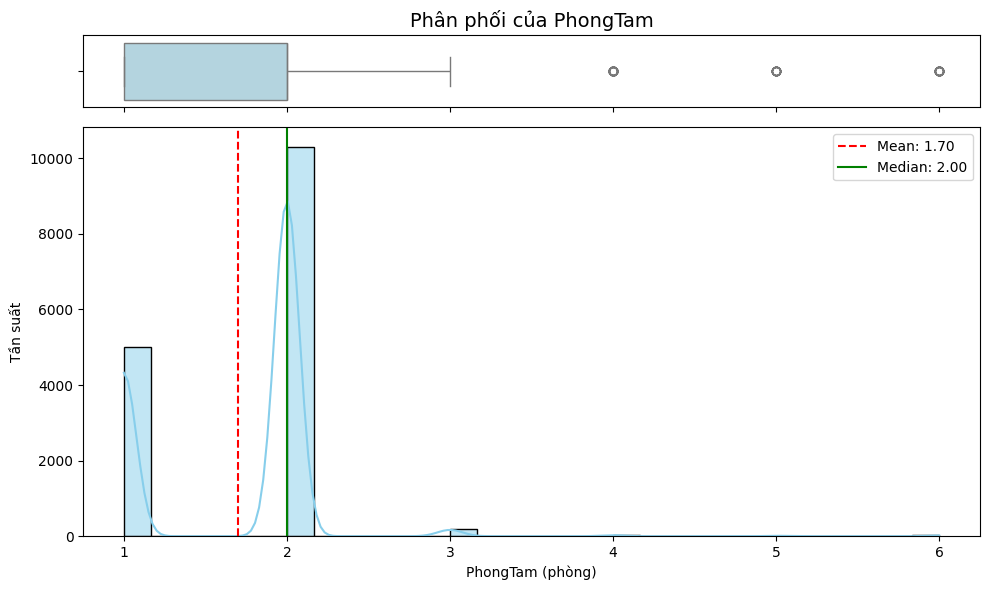

In [43]:
analyze_numerical_feature(df, 'PhongTam', unit='phòng')

> **Remark**

* Central Tendency

  * Mode (2.00) = Median (2.00) > Mean (1.68):

    * Con số 2 thống trị tuyệt đối -> Chuẩn thiết kế căn hộ chung cư hiện đại tại Việt Nam là 2PN + 2WC.

  * Mức trung bình 1.68 (thấp hơn 2) cho thấy một tỷ trọng đáng kể của nhóm căn hộ 1WC. Đây thường là các căn 1PN, 1PN+1 hoặc Studio, và đôi khi là các căn 2PN cũ (thiết kế kiểu cũ 2PN + 1WC)

* Distribution Shape

  * Discrete & Bimodal-ish

    * Thị trường chia làm 2 phe rõ rệt: Phe 2WC (cao nhất) và Phe 1WC (cao nhì).

    * Nhóm 3WC trở lên rất thấp, gần như không đáng kể trên biểu đồ

 * Skewness = 0.699 (Lệch phải vừa phải):

    * Độ lệch không quá lớn (nhỏ hơn nhiều so với biến Giá). Điều này phản ánh cấu trúc vật lý của căn hộ có giới hạn: Dù nhà có rộng đến mấy thì số lượng toilet cũng hiếm khi tăng đột biến theo cấp số nhân như giá tiền.

  * Kurtosis = 6.03 (Leptokurtic - Cao): Dữ liệu tập trung rất mạnh vào giá trị 1 và 2.

* Outliers & Dispersion

  * Std = 0.54: Độ phân tán cực thấp. Nếu nhắm mắt chọn bừa một căn hộ, xác suất 95% nó sẽ có 1 hoặc 2 toilet. Biến số này có Information Gain (Lượng thông tin) thấp hơn so với DienTich hay Gia

  * Max = 6.00:  Với các căn Penthouse/Duplex diện tích > 150m2 (mà ta đã thấy ở phần phân tích Diện tích), việc có 4-6 toilet là hợp lý. Đây không phải lỗi dữ liệu -> Valid Outlier

-----------------------------------------------------------

> **Model implication**

* Multicollinearity: PhongTam & PhongNgu

  * PhongTam và PhongNgu thường tương quan cực mạnh (Correlation > 0.8). Căn 2PN thường có 2WC, 3PN thường có 2-3WC.

  * Nếu đưa cả 2 biến này vào mô hình Linear Regression, chúng có thể triệt tiêu ý nghĩa của nhau -> Cần kiểm tra đa cộng tuyến

* Xử lý:

  * Clipping: Tương tự PhongNgu, hãy gộp tất cả các giá trị >= 3 thành nhóm 3+. Vì số lượng mẫu 4, 5, 6 quá ít để mô hình học được quy luật riêng.
    


###### **Triển khai thử đề xuất**

In [44]:
# CLIPPING (CẮT NGỌN PHÒNG TẮM)
# Gộp tất cả các giá trị PhongTam >= 3 về thành 3
# Lý do: Nhóm 4, 5, 6 WC quá ít, gộp vào để tăng ý nghĩa thống kê cho nhóm "Nhiều WC"
df['PhongTam_Clipped'] = df['PhongTam'].clip(upper=3)

##Bivariate Analysis

### Multicollinearity

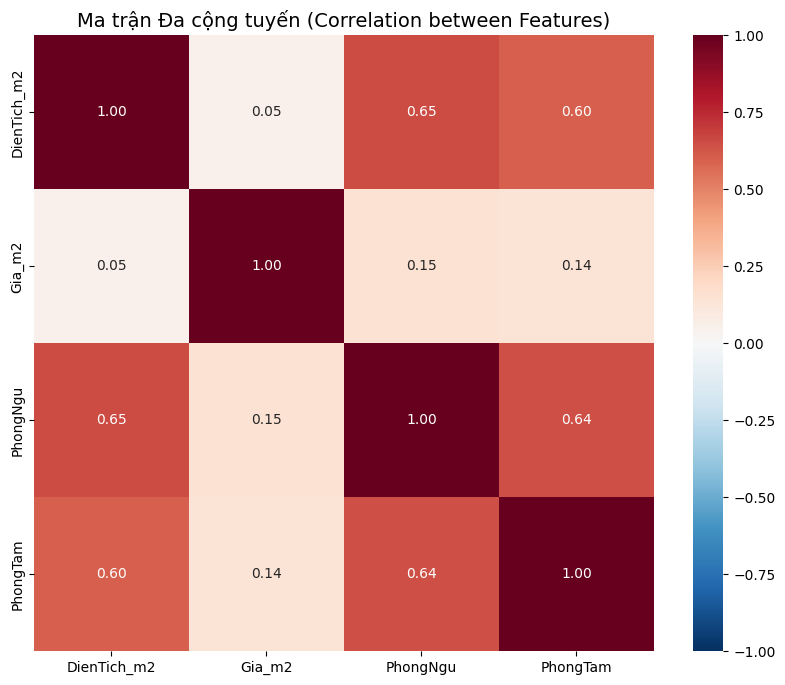


=== KẾT QUẢ VIF (VARIANCE INFLATION FACTOR) ===
Quy tắc: VIF > 5 là Cảnh báo, VIF > 10 là Nguy hiểm (Phải loại bỏ)
------------------------------------------------------------
       Feature       VIF
3     PhongNgu  2.126519
1  DienTich_m2  1.934169
4     PhongTam  1.888172
2       Gia_m2  1.034054


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. CHỌN CÁC BIẾN SỐ (NUMERICAL) CẦN KIỂM TRA
# Lưu ý: KHÔNG đưa biến Target (Log_Gia) vào đây.
# Chúng ta chỉ kiểm tra quan hệ giữa các biến X với nhau.
features_to_check = ['DienTich_m2',
                      'Gia_m2',
                      'PhongNgu',
                      'PhongTam']

# Lọc dữ liệu và bỏ hàng trống để tính toán
X = df[features_to_check].dropna()

# --- PHẦN 1: TRỰC QUAN HÓA HEATMAP ---
plt.figure(figsize=(10, 8))
# Tính ma trận tương quan giữa các biến X
corr_matrix = X.corr()

# Vẽ Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, fmt='.2f')
plt.title('Ma trận Đa cộng tuyến (Correlation between Features)', fontsize=14)
plt.show()

# --- PHẦN 2: TÍNH VIF (VARIANCE INFLATION FACTOR) ---
# VIF là tiêu chuẩn vàng để bắt bệnh đa cộng tuyến
# Công thức: VIF = 1 / (1 - R^2_i)

# Thêm hằng số (intercept) vào để tính VIF chính xác
X_with_const = add_constant(X)

# Tạo DataFrame chứa kết quả VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(len(X_with_const.columns))]

# Loại bỏ dòng hằng số (const) để dễ nhìn
vif_data = vif_data[vif_data["Feature"] != "const"].sort_values(by="VIF", ascending=False)

print("\n=== KẾT QUẢ VIF (VARIANCE INFLATION FACTOR) ===")
print("Quy tắc: VIF > 5 là Cảnh báo, VIF > 10 là Nguy hiểm (Phải loại bỏ)")
print("-" * 60)
print(vif_data)

> **Remark**

* Các biến đều độc lập

### Tương quan giữa Numerical features & Target

--- 1. CHỈ SỐ: HỆ SỐ TƯƠNG QUAN PEARSON (r) VỚI LOG(GIÁ) ---
Log_Gia_m2_trieu    0.827521
Gia_m2              0.740975
Gia_m2_trieu        0.740975
DienTich_m2         0.594747
PhongNgu            0.436110
PhongNgu_Clipped    0.429505
PhongTam            0.412398
PhongTam_Clipped    0.394840
DT_per_PN           0.088760
Name: Log_Gia, dtype: float64

--- 2. TRỰC QUAN: SCATTER PLOT (Quan hệ Tuyến tính vs. Phi tuyến) ---


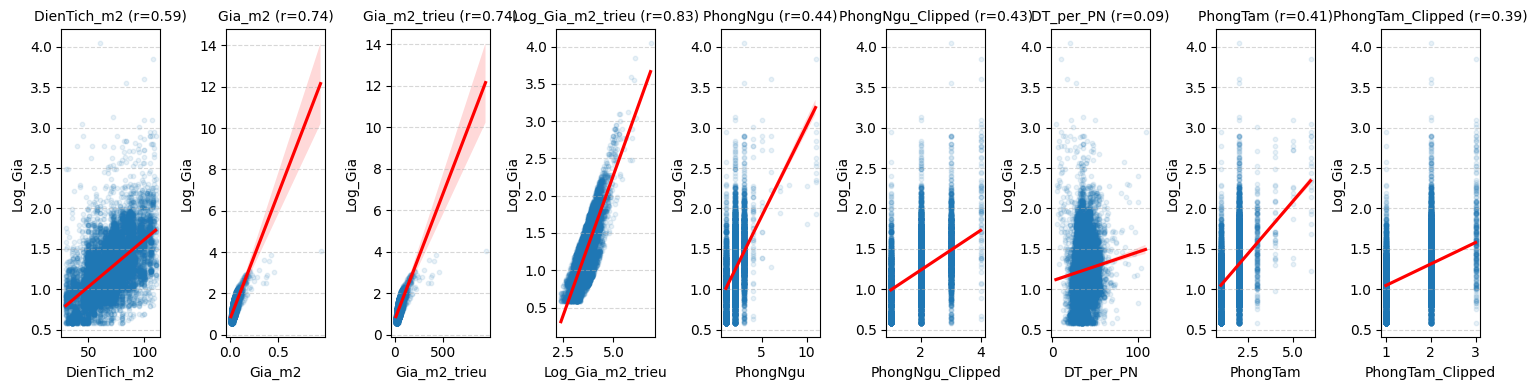

In [46]:
# --- 1. THIẾT LẬP DỮ LIỆU ---

# Danh sách features định lượng quan trọng (Loại bỏ Gia_m2 vì Data Leakage)
core_numerical_features = ['DienTich_m2',
                           'Gia_m2', 'Gia_m2_trieu', 'Log_Gia_m2_trieu',
                           'PhongNgu', 'PhongNgu_Clipped', 'DT_per_PN',
                           'PhongTam', 'PhongTam_Clipped']

# --- 2. TÍNH CHỈ SỐ ĐÁNG TIN CẬY (PEARSON R) ---
correlations = df[core_numerical_features + ['Log_Gia']].corr()['Log_Gia'].sort_values(ascending=False)
correlations = correlations.drop('Log_Gia')

print("--- 1. CHỈ SỐ: HỆ SỐ TƯƠNG QUAN PEARSON (r) VỚI LOG(GIÁ) ---")
print(correlations)

# --- 3. TRỰC QUAN HÓA (VISUALIZATION) ---
print("\n--- 2. TRỰC QUAN: SCATTER PLOT (Quan hệ Tuyến tính vs. Phi tuyến) ---")
plt.figure(figsize=(15, 4))

for i, feature in enumerate(core_numerical_features):
    plt.subplot(1, len(core_numerical_features), i + 1)
    # Dùng regplot để vẽ Scatter Plot và đường hồi quy tuyến tính (xu hướng)
    sns.regplot(x=feature, y='Log_Gia', data=df,
                scatter_kws={'alpha':0.1, 's':10}, # Giảm độ đậm và kích thước điểm
                line_kws={'color':'red'})
    plt.title(f'{feature} (r={correlations.loc[feature]:.2f})', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

> **Remark**

*  Gia_m2, Gia_m2_trieu có tương quan dự báo bằng nhau ( khoảng 0.74) vì chỉ đổi đơn vị và nhỏ hơn Log_Gia_m2_trieu (0.83) -> Dù có tương quan cực kì mạnh với target nhưng gây Data leakage, không thể đưa vào mô hình

* DienTich_m2: Tương quan tuyến tính dương rất mạnh với target (r > 0.59)

* PhongNgu, PhongTam, PhongNgu_Clipped, PhongTam_Clipped: Nghi ngờ đa cộng tuyến

  * Tương quan mạnh với target (r > 0.44)

  * Tương quan dự báo tương đương nhau -> Giữ lại biến có tương quan cao hơn một chút (PhongNgu) và loại bỏ biến còn lại để tránh làm nhiễu hệ số trong mô hình tuyến tính.

  * PhongNgu_Clipped giảm sức mạnh dự báo do (gom các outliers ít ỏi vào nhóm lớn hơn) nhưng tăng độ tin cậy cho mô hình với những dữ liệu chưa thấy

* DT_per_PN: Thử nghiệm thất bại (tương quan thấp)

  * Có thể do biến DT_per_PN đã vô tình loại bỏ yếu tố Quy mô. Việc có nhiều diện tích trên mỗi phòng ngủ không phải là yếu tố làm tăng giá tuyến tính tổng thể, vì giá chủ yếu được quyết định bởi Tổng diện tích và Tổng số phòng. Hành động

----------------------------------------------------------

> **Tổng kết cho mô hình**

* Important Features: DienTich_m2, PhongNgu_Clipped

### Tương quan giữa Categorical Features & Target

=== BÁO CÁO PHÂN TÍCH ANOVA (DẠNG NGANG - HORIZONTAL) ===
Feature              | F-Score    | P-value         | Kết luận
---------------------------------------------------------------------------
Phan_Khuc            | 1726.44    | < 0.001         | ⭐⭐⭐


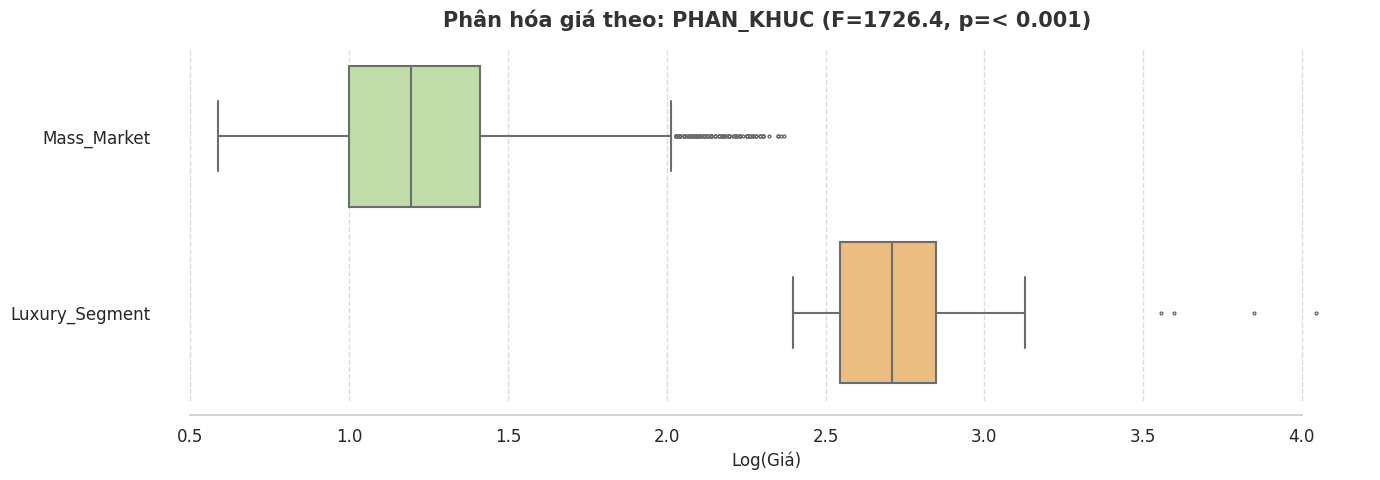



Quan                 | 211.79     | < 0.001         | ⭐⭐⭐


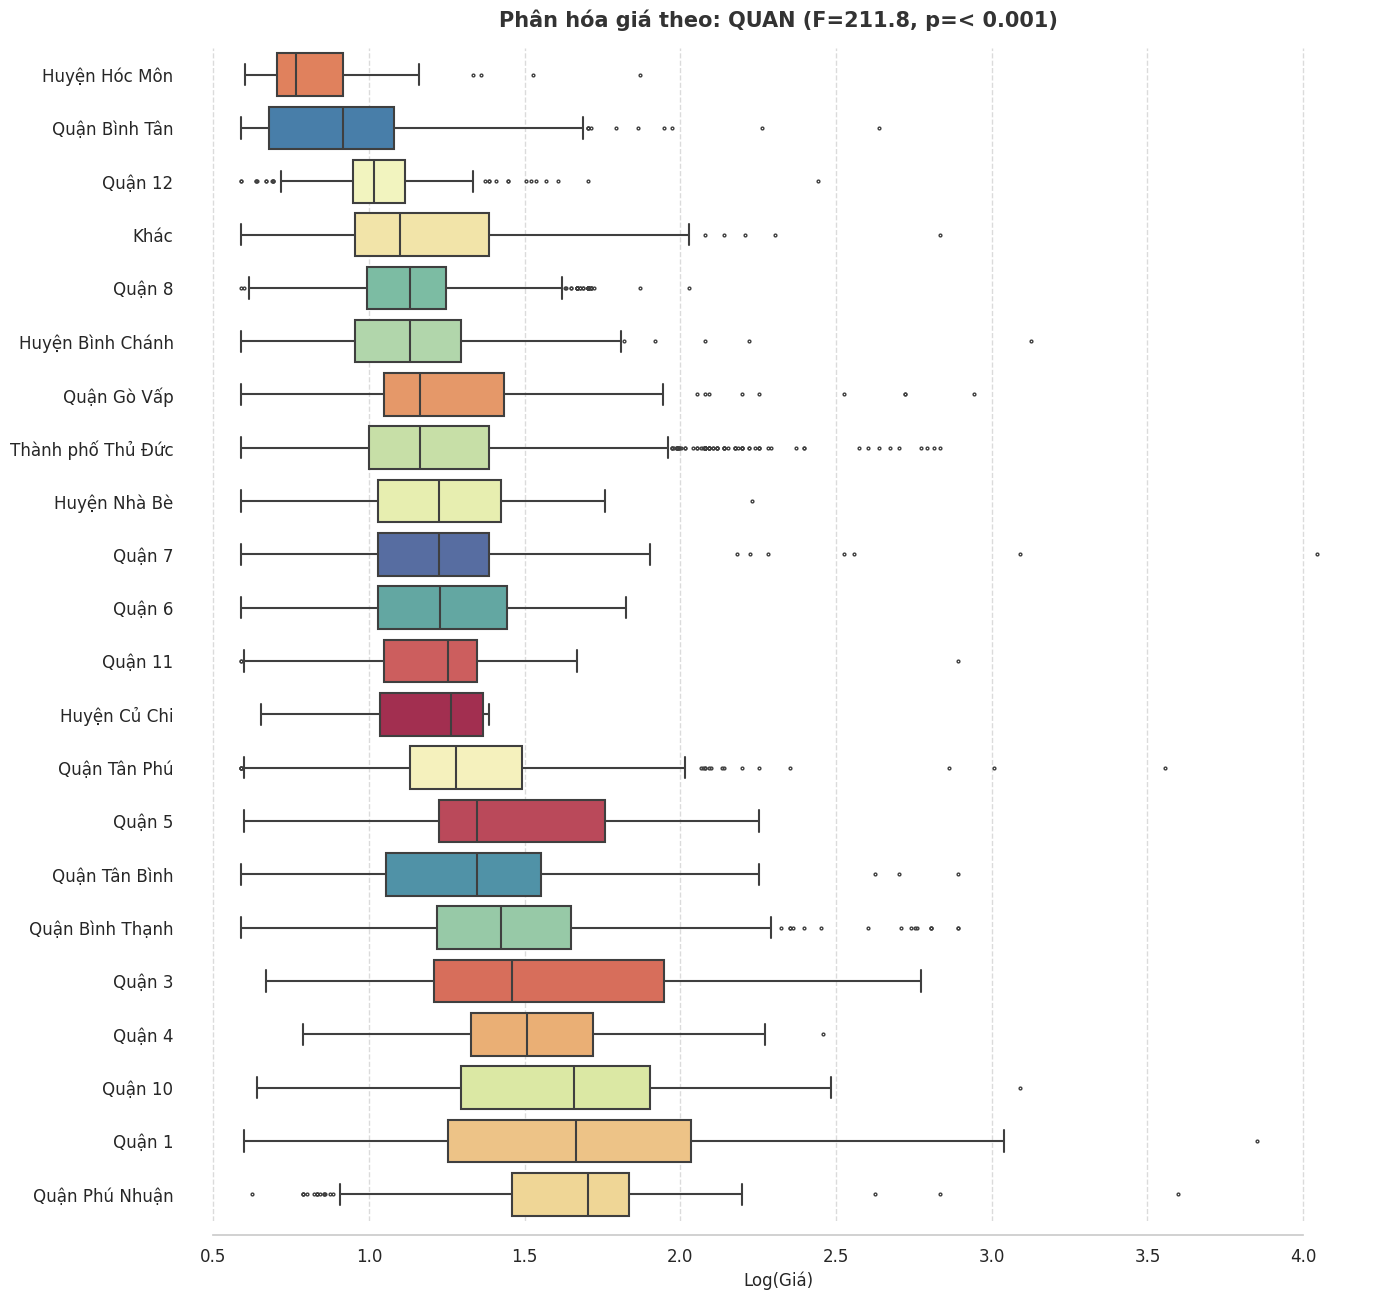



Loai                 | 49.81      | < 0.001         | ⭐⭐⭐


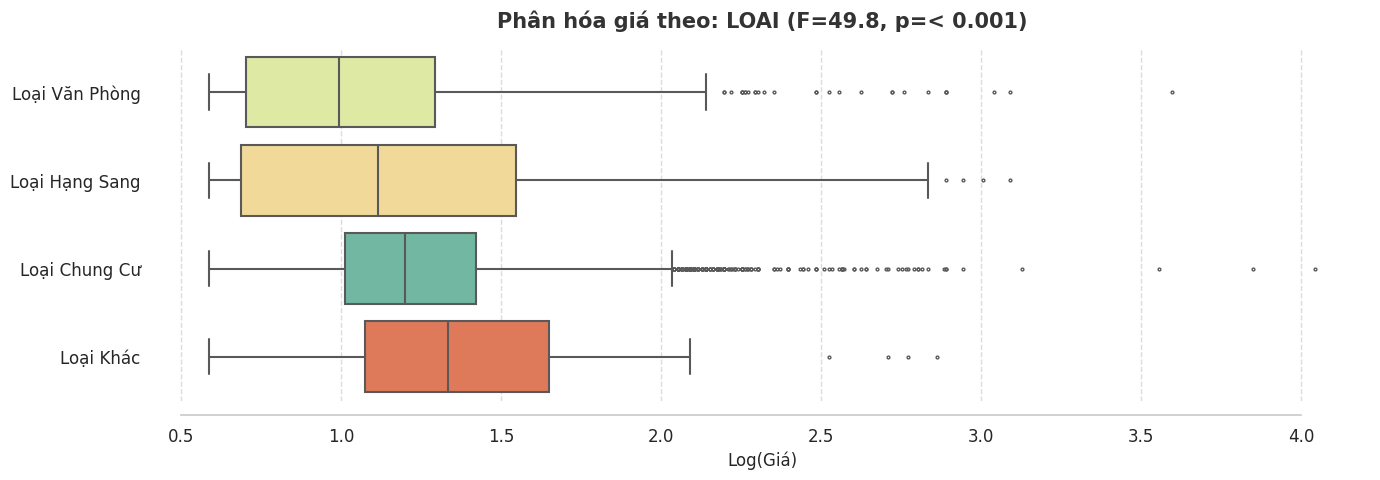



GiayTo               | 14.06      | < 0.001         | ⭐⭐⭐


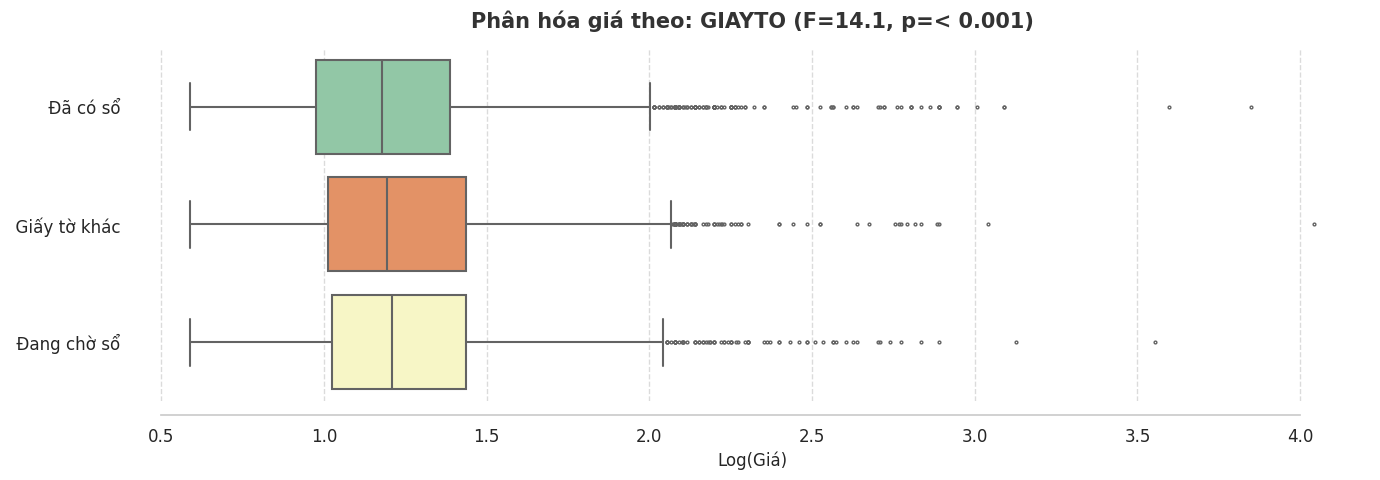



TinhTrangNoiThat     | 105.96     | < 0.001         | ⭐⭐⭐


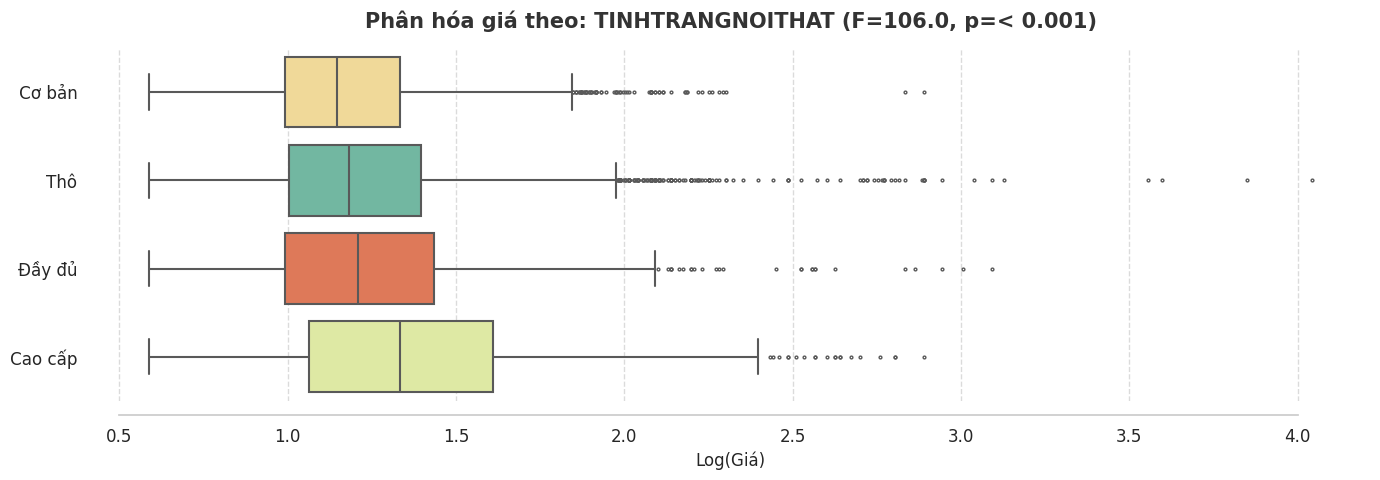



HuongCuaChinh        | 10.82      | < 0.001         | ⭐⭐⭐


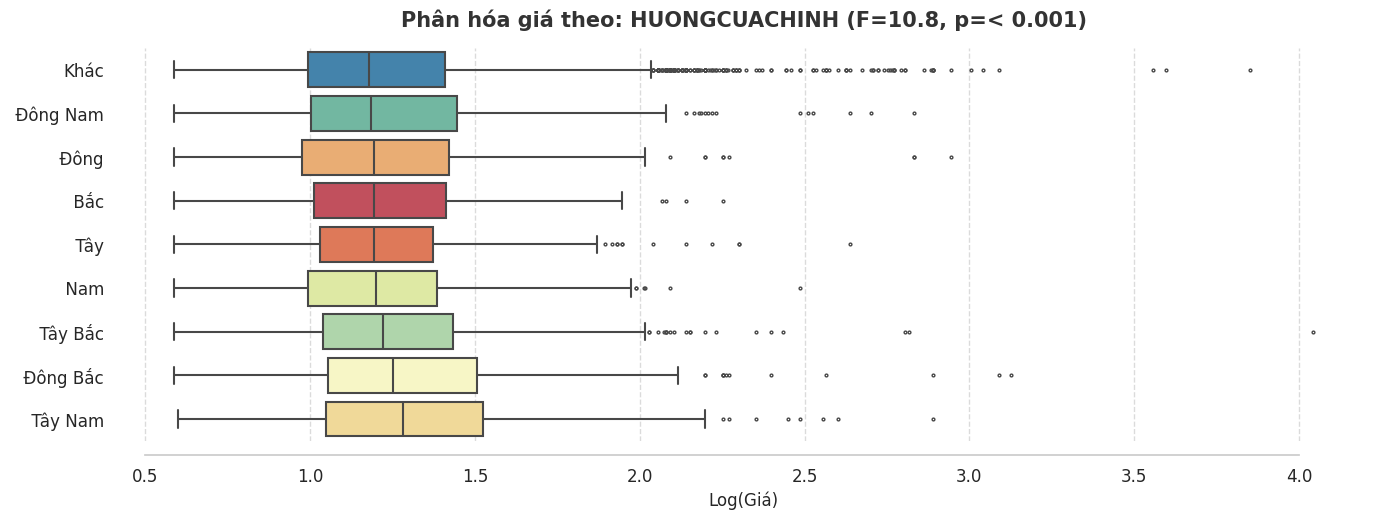



HuongBanCong         | 12.22      | < 0.001         | ⭐⭐⭐


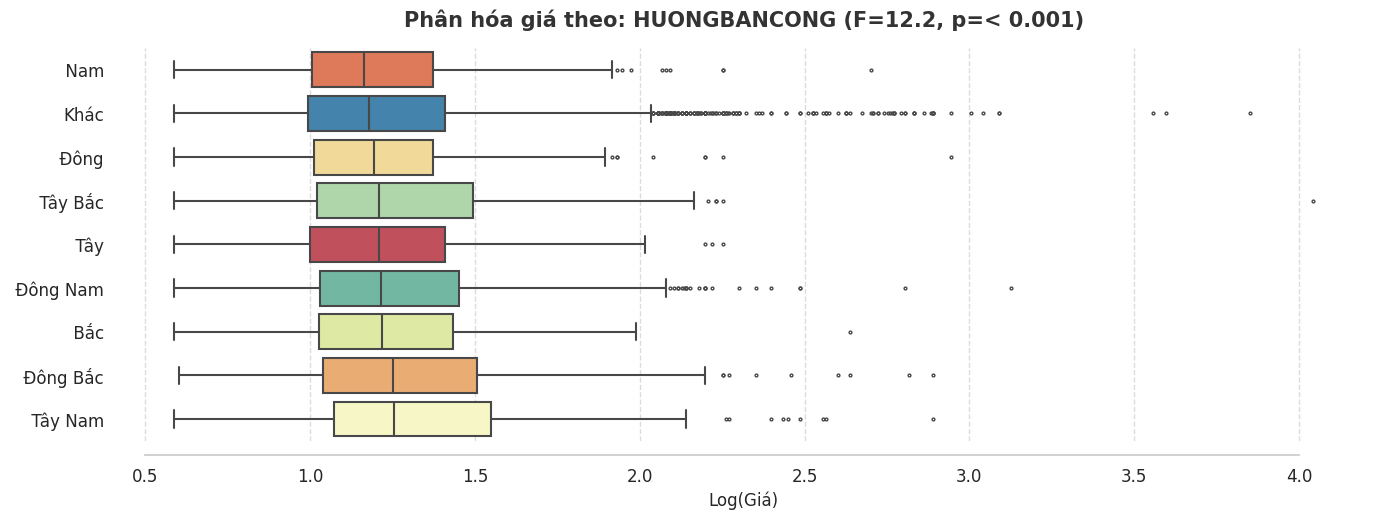



CanGoc               | 17.35      | < 0.001         | ⭐⭐⭐


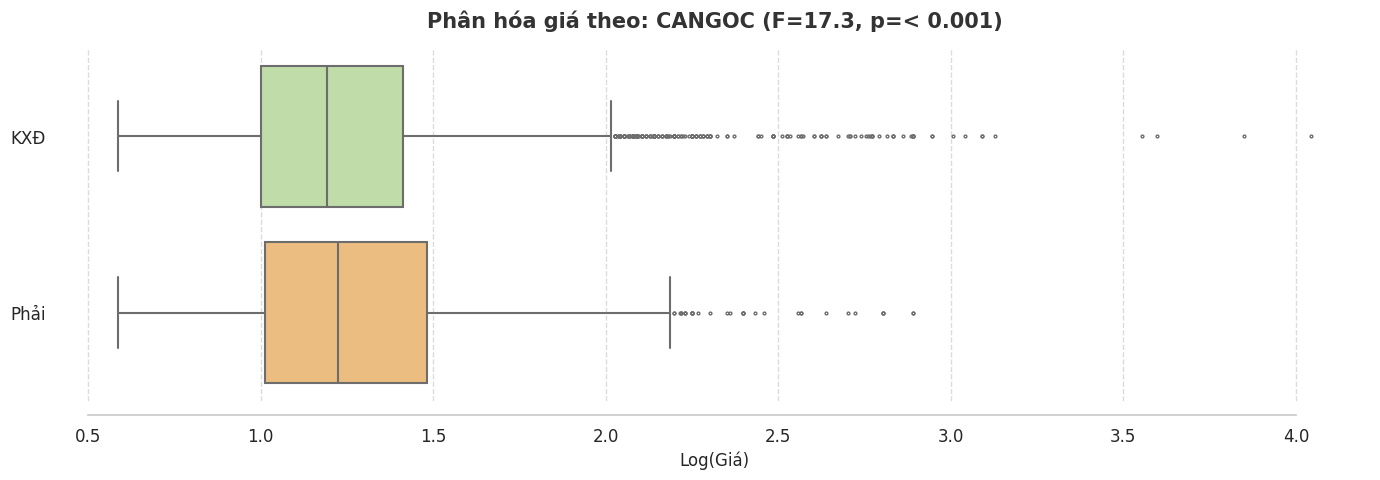



TinhTrangBDS         | 427.22     | < 0.001         | ⭐⭐⭐


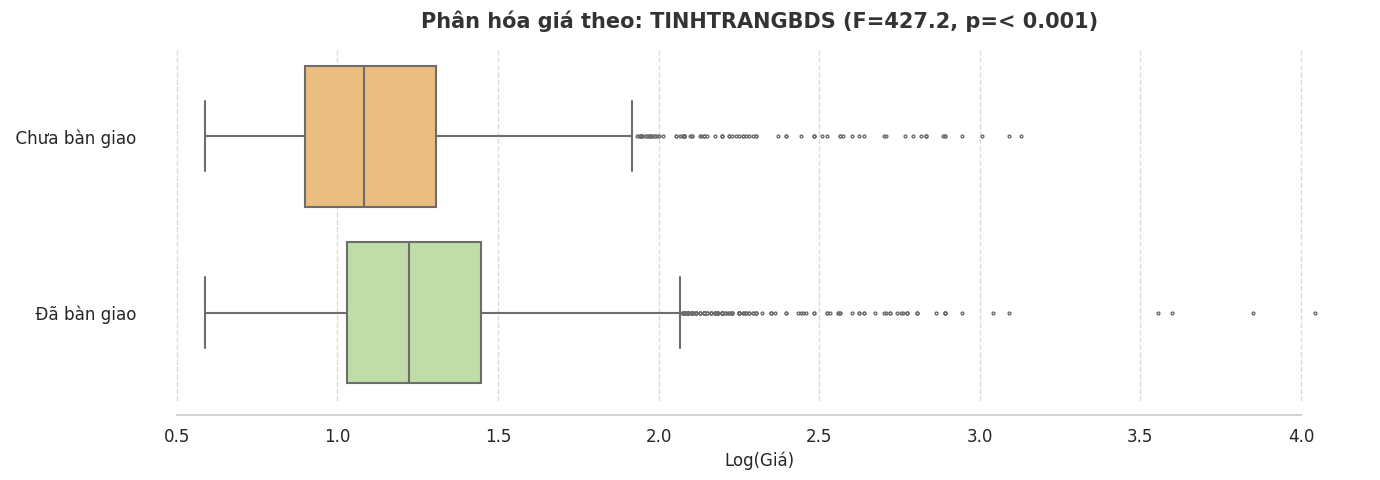

In [47]:
import scipy.stats as stats

# --- 1. CẤU HÌNH GIAO DIỆN ---
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.1)

# Danh sách biến phân loại
categorical_features = [
    'Phan_Khuc',
    'Quan',
    'Loai',
    'GiayTo',
    'TinhTrangNoiThat',
    'HuongCuaChinh',
    'HuongBanCong',
    'CanGoc',
    'TinhTrangBDS'
]

# Chuẩn bị dữ liệu sạch
if 'df_clean' not in locals():
    df_clean = df[df['Gia'] >= 0.8].copy()
    if 'Log_Gia' not in df_clean.columns:
        df_clean['Log_Gia'] = np.log1p(df_clean['Gia'])

print("=== BÁO CÁO PHÂN TÍCH ANOVA (DẠNG NGANG - HORIZONTAL) ===")
print(f"{'Feature':<20} | {'F-Score':<10} | {'P-value':<15} | {'Kết luận'}")
print("-" * 75)

# --- 2. VÒNG LẶP VẼ BIỂU ĐỒ ---
for cat_col in categorical_features:
    if cat_col not in df_clean.columns:
        continue

    data_clean = df_clean.dropna(subset=[cat_col])
    groups = [d for k, d in data_clean.groupby(cat_col)['Log_Gia']]

    if len(groups) < 2:
        continue

    # Tính toán ANOVA
    f_score, p_value = stats.f_oneway(*groups)

    p_str = "< 0.001" if p_value < 0.001 else f"{p_value:.4f}"
    star = "⭐⭐⭐" if p_value < 0.001 else ("⭐" if p_value < 0.05 else "")

    print(f"{cat_col:<20} | {f_score:<10.2f} | {p_str:<15} | {star}")

    # SẮP XẾP: Tính median để sort từ dưới lên trên (hoặc trên xuống dưới)
    order = data_clean.groupby(cat_col)['Log_Gia'].median().sort_values().index

    # --- TỰ ĐỘNG ĐIỀU CHỈNH CHIỀU CAO (DYNAMIC HEIGHT) ---
    # Nếu có nhiều nhóm (như Quận), hình phải dài ra. Nếu ít nhóm, hình ngắn lại.
    # Công thức: Mỗi nhóm tốn khoảng 0.6 inch + 2 inch lề
    dynamic_height = max(5, len(order) * 0.6)

    plt.figure(figsize=(14, dynamic_height))

    # --- VẼ BOXPLOT NGANG ---
    # Thay đổi quan trọng: x='Log_Gia', y=cat_col (Đảo trục)
    ax = sns.boxplot(y=cat_col, x='Log_Gia', data=data_clean, order=order,
                     palette='Spectral_r', hue=cat_col, legend=False,
                     linewidth=1.5, fliersize=2, orient='h') # orient='h' để chắc chắn vẽ ngang

    # Tinh chỉnh trục và tiêu đề
    plt.title(f'Phân hóa giá theo: {cat_col.upper()} (F={f_score:.1f}, p={p_str})',
              fontsize=15, fontweight='bold', color='#333333', pad=15)

    plt.xlabel('Log(Giá)', fontsize=12)
    plt.ylabel('') # Bỏ nhãn trục Y vì tên Category đã rõ ràng

    # Tinh chỉnh trục X (Giá trị Log)
    plt.grid(axis='x', linestyle='--', alpha=0.7) # Kẻ lưới dọc để dễ so sánh giá

    # Loại bỏ khung viền thừa
    sns.despine(trim=True, offset=10, left=True) # Bỏ trục dọc bên trái cho thoáng
    # ----------------------------------------------------
    # XUẤT FILE ẢNH CHẤT LƯỢNG CAO
    # 1. Đặt tên file động: boxplot_Quan.png, boxplot_Phan_Khuc.png
    filename = f"boxplot_{cat_col}_horizontal.png"

    # 2. Lệnh lưu file:
    # dpi=300 (Độ phân giải cao) | bbox_inches='tight' (Đảm bảo nhãn không bị cắt)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    # ----------------------------------------------------
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")

> **Remark**

* The Drivers: F-Score cực cao (> 100) hoặc Tương quan rất mạnh -> Chúng quyết định 80% độ chính xác của mô hình

  * Phan_Khuc (F-Score = 1726.4):

    * Đánh giá: Chỉ số F-Score cao kỷ lục xác nhận việc phân chia thị trường thành "Mass Market" và "Luxury Segment" là hoàn toàn chính xác. Sự tách biệt về giá giữa hai nhóm này là tuyệt đối

    * Lưu ý: Không dùng làm biến đầu vào (Feature) cho một mô hình chung (vì nó được tạo từ Target), mà dùng làm tiêu chí để tách mô hình (Segmentation) -> Nên build 2 model riêng biệt: một cho nhà <10 tỷ và một cho nhà >10 tỷ.

  * TinhTrangBDS (F-Score = 427.2)

    * Đánh giá: Đây là phát hiện thú vị nhất. Trạng thái "Chưa bàn giao" và "Đã bàn giao" tạo ra sự phân hóa giá cực lớn. Dự án đã bàn giao (Completed) có giá trị trung vị cao hơn và ổn định hơn. Dự án chưa bàn giao có rủi ro cao hơn nên giá thấp hơn hoặc biến động mạnh hơn.

  * Quan (F-Score = 211.8)

    * Đánh giá: Biến định vị không gian quan trọng nhất. Biểu đồ Boxplot cho thấy hiệu ứng "bậc thang" hoàn hảo: Từ vùng ven (Hóc Môn, Bình Tân) leo dần lên trung tâm (Quận 1, Phú Nhuận). Đây là xương sống của mô hình định giá

  * TinhTrangNoiThat (F-Score = 106.0)

    * Đánh giá: Sự khác biệt giữa "Nội thất Cơ bản" và "Cao cấp" là rất rõ ràng. Thị trường sẵn sàng trả thêm tiền (premium) cho sự tiện nghi sẵn có.
  
* The Supporters:

  * Loai (F-Score = 49.8):

    * Đánh giá: Phân biệt tốt giữa "Chung cư" thông thường và "Hạng sang/Văn phòng". Tuy nhiên, do nhóm Chung cư chiếm đa số áp đảo nên sức mạnh tổng thể thấp hơn Quận.
  
  * CanGoc (F-Score = 17.3):

    * Đánh giá: Căn góc thường đắt hơn căn thường nhờ view và độ thoáng. F-Score mức 17 là đủ tốt để giữ lại, giúp model thưởng thêm giá cho các căn này.
  
  * GiayTo (F-Score = 14.1):

    * Đánh giá: Pháp lý có ảnh hưởng nhưng không quá lớn như kỳ vọng (có thể do phần lớn là Sổ hồng/HĐMB - độ an toàn tương đương nhau trong mắt người mua chung cư hiện tại)
  
* The Noise

  * HuongBanCong (F = 12.2) & HuongCuaChinh (F = 10.8)

    * Đánh giá: Biểu đồ Boxplot cho thấy các hộp nằm khá ngang bằng nhau. Người mua nhà có quan tâm phong thủy, nhưng ở góc độ dữ liệu lớn, giá của Hướng Đông và Hướng Tây không chênh lệch đủ nhiều để tạo ra quy luật thống kê mạnh. -> Có thể cân nhắc loại bỏ nếu muốn đơn giản hóa mô hình (Feature Pruning)

### **IMPORTANT FEATURES**
1. DienTich_m2 (Numerical): Quy mô căn hộ.

2. Quan (Categorical): Vị trí địa lý (Yếu tố sống còn).

3. TinhTrangBDS (Categorical): Mới hay cũ, rủi ro hay an toàn.

4. TinhTrangNoiThat (Categorical): Mức độ hoàn thiện.

5. PhongNgu_Clipped (Numerical): Công năng sử dụng.

6. Loai (Categorical): Phân loại sản phẩm.

7. CanGoc (Categorical): Yếu tố vị trí trong tòa nhà.

8. GiayTo (Categorical): Rủi ro pháp lý

------------------------------------------------------
> **Chiến lược gợi ý**

* Sử dụng Phan_Khuc để chia dữ liệu thành 2 tập train riêng biệt (nếu có đủ dữ liệu), không dùng làm feature.

* Biến mục tiêu (Target) bắt buộc phải là Log_Gia

## Deep Dive Analysis

###**Kiểm chứng: Dữ liệu 'KXĐ' ở CanGoc có phải là missing values không ?**

  * Trong một mặt sàn chung cư điển hình (Layout), thường có từ 8 đến 20 căn hộ.

  * Số lượng căn góc luôn cố định là 4 căn (ở 4 góc tòa nhà)

  * Tỷ lệ căn góc thực tế = 4/ Tổng số căn, thường dao động từ 15 - 25%. Khớp với tỷ lệ 'Phải' (22.12%)

 * **Kết luận:**  Chấp nhận giả định rằng giá trị "KXĐ" ở đây thực chất là "Không" (False)

=== KIỂM CHỨNG BẢN CHẤT MISSING VALUES (KXĐ) ===
1. TỶ LỆ PHÂN BỐ:
CanGoc
KXĐ     78.910211
Phải    21.089789
Name: proportion, dtype: float64
-> Nhóm KXĐ chiếm 78.91%
   (Chuẩn thị trường: Căn thường chiếm 75-85%. Nếu khớp -> Tín hiệu tốt số 1)

2. SO SÁNH GIÁ TRỊ:
   - Median Log(Gia) [Phải]: 1.22
   - Median Log(Gia) [KXĐ] : 1.19
   - Chênh lệch (Premium)  : +4.8%
   - P-value (One-sided)   : 0.00003

KẾT LUẬN: XÁC NHẬN!
   1. Nhóm 'Phải' có giá cao hơn hẳn nhóm 'KXĐ' (Có ý nghĩa thống kê).
   2. Tỷ lệ phân bố hợp lý.
   -> 'KXĐ' chính xác là 'Căn thường' (Không phải góc).
   -> Missing Values ở đây mang ý nghĩa là 'Không'.


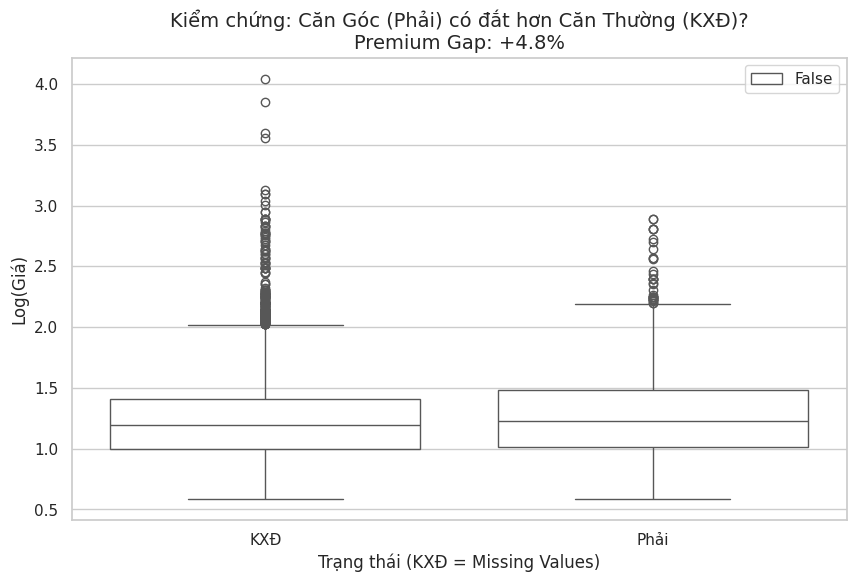

In [48]:
from scipy import stats

# --- 1. CHUẨN BỊ DỮ LIỆU ---
sns.set_theme(style="whitegrid")
# Lấy df gốc đã điền 'KXĐ' vào chỗ missing
df_check = df.copy()
# Lọc rác giá thấp để công bằng
df_check = df_check[df_check['Gia'] >= 0.8]
df_check['Log_Gia'] = np.log1p(df_check['Gia'])

print("=== KIỂM CHỨNG BẢN CHẤT MISSING VALUES (KXĐ) ===")

# --- 2. KIỂM TRA TỶ LỆ (RATIO CHECK) ---
counts = df_check['CanGoc'].value_counts(normalize=True) * 100
print("1. TỶ LỆ PHÂN BỐ:")
print(counts)
print(f"-> Nhóm KXĐ chiếm {counts.get('KXĐ', 0):.2f}%")
print("   (Chuẩn thị trường: Căn thường chiếm 75-85%. Nếu khớp -> Tín hiệu tốt số 1)")

# --- 3. KIỂM TRA GIÁ (PRICE PREMIUM CHECK) ---
# Lấy dữ liệu 2 nhóm
group_phai = df_check[df_check['CanGoc'] == 'Phải']['Log_Gia']
group_kxd = df_check[df_check['CanGoc'] == 'KXĐ']['Log_Gia']

# Tính chênh lệch Median
gap = group_phai.median() - group_kxd.median()
# Chuyển về % giá trị thực để dễ hình dung (xấp xỉ)
gap_percent = (np.expm1(group_phai.median()) - np.expm1(group_kxd.median())) / np.expm1(group_kxd.median()) * 100

print("\n2. SO SÁNH GIÁ TRỊ:")
print(f"   - Median Log(Gia) [Phải]: {group_phai.median():.2f}")
print(f"   - Median Log(Gia) [KXĐ] : {group_kxd.median():.2f}")
print(f"   - Chênh lệch (Premium)  : +{gap_percent:.1f}%")

# Kiểm định T-test (H0: Giá Phải = Giá KXĐ)
# Chúng ta kỳ vọng p-value cực nhỏ để BÁC BỎ H0
t_stat, p_val = stats.ttest_ind(group_phai, group_kxd, equal_var=False, alternative='greater')

print(f"   - P-value (One-sided)   : {p_val:.5f}")

if p_val < 0.05 and gap > 0:
    print("\nKẾT LUẬN: XÁC NHẬN!")
    print("   1. Nhóm 'Phải' có giá cao hơn hẳn nhóm 'KXĐ' (Có ý nghĩa thống kê).")
    print("   2. Tỷ lệ phân bố hợp lý.")
    print("   -> 'KXĐ' chính xác là 'Căn thường' (Không phải góc).")
    print("   -> Missing Values ở đây mang ý nghĩa là 'Không'.")
else:
    print("\n KẾT LUẬN: NGHI NGỜ.")
    print("   Không thấy sự chênh lệch giá rõ ràng. Có thể dữ liệu KXĐ bị lẫn lộn.")

# --- 4. TRỰC QUAN HÓA ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='CanGoc', y='Log_Gia', data=df_check,
            order=['KXĐ', 'Phải'],
            palette={'KXĐ': '#95a5a6', 'Phải': '#e74c3c'}, hue = False)

plt.title(f'Kiểm chứng: Căn Góc (Phải) có đắt hơn Căn Thường (KXĐ)?\nPremium Gap: +{gap_percent:.1f}%', fontsize=14)
plt.xlabel('Trạng thái (KXĐ = Missing Values)')
plt.ylabel('Log(Giá)')
plt.show()

### **Hypothesis Testing: Giá bất động sản hướng Đông Nam sẽ có mức chênh lệch giá (premium) cao hơn so với các hướng còn lại**

In [49]:
import numpy as np
import pandas as pd
from scipy import stats

# --- 1. CHUẨN BỊ DỮ LIỆU ---
df_check = df.copy()

# BƯỚC DEBUG QUAN TRỌNG: In ra các giá trị thực tế để không bao giờ sai nữa
print("Các giá trị Hướng thực tế trong dữ liệu:")
print(df_check['HuongBanCong'].unique())
print("-" * 50)

# --- 2. ĐỊNH NGHĨA LẠI HÀM PHÂN NHÓM (DÙNG TÊN ĐẦY ĐỦ) ---
def group_direction(direction):
    # Chuẩn hóa chuỗi: Xóa khoảng trắng thừa (nếu có)
    d = str(direction).strip()

    # Nhóm Premium (Mát): Đông, Nam, Đông Nam
    if d in ['Đông Nam', 'Đông', 'Nam']:
        return 'DongNam_Premium'

    # Nhóm Baseline (Nắng): Tây, Tây Bắc, Tây Nam, Bắc (Bắc đôi khi lạnh/nắng tùy mùa, xếp tạm vào đây hoặc tách riêng)
    elif d in ['Tây', 'Tây Bắc', 'Bắc', 'Tây Nam']:
        return 'TayBac_Baseline'

    return 'Other'

# Tạo cột nhóm mới
df_check['Huong_Group'] = df_check['HuongBanCong'].apply(group_direction)

# --- 3. CHẠY LẠI KIỂM ĐỊNH ---
group_premium = df_check[df_check['Huong_Group'] == 'DongNam_Premium']['Log_Gia'].dropna()
group_baseline = df_check[df_check['Huong_Group'] == 'TayBac_Baseline']['Log_Gia'].dropna()

print(f"Số lượng mẫu Đông Nam (Mát): n={len(group_premium)}")
print(f"Số lượng mẫu Tây/Bắc (Nắng): n={len(group_baseline)}")

if len(group_premium) > 0 and len(group_baseline) > 0:
    # T-test một phía (Greater)
    t_stat, p_val = stats.ttest_ind(group_premium, group_baseline, equal_var=False, alternative='greater')

    print("\n=== KẾT QUẢ KIỂM ĐỊNH GIẢ THUYẾT ===")
    print(f"Trung bình giá (Log) nhóm Mát : {group_premium.mean():.4f}")
    print(f"Trung bình giá (Log) nhóm Nắng: {group_baseline.mean():.4f}")
    print(f"P-value: {p_val:.5f}")

    if p_val < 0.05:
        print("KẾT LUẬN: Bác bỏ H0. Hướng Đông Nam/Mát có giá cao hơn thật sự (Premium confirmed).")
    else:
        print("KẾT LUẬN: Không đủ bằng chứng. Thị trường không định giá cao hơn cho hướng mát.")

Các giá trị Hướng thực tế trong dữ liệu:
['Khác' ' Đông Nam' ' Tây Bắc' ' Bắc' ' Tây Nam' ' Đông' ' Đông Bắc'
 ' Nam' ' Tây']
--------------------------------------------------
Số lượng mẫu Đông Nam (Mát): n=2441
Số lượng mẫu Tây/Bắc (Nắng): n=2031

=== KẾT QUẢ KIỂM ĐỊNH GIẢ THUYẾT ===
Trung bình giá (Log) nhóm Mát : 1.2376
Trung bình giá (Log) nhóm Nắng: 1.2641
P-value: 0.99706
KẾT LUẬN: Không đủ bằng chứng. Thị trường không định giá cao hơn cho hướng mát.


In [50]:
df = df_original

NameError: name 'df_original' is not defined

# E. ML model

In [ ]:
!pip install xgboost --quiet

In [ ]:
import os
import logging
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

## 1.Load dữ liệu

In [ ]:
clean_file = working_path + 'df_model_ready.csv'
df = pd.read_csv(clean_file)

print("Shape dữ liệu clean:", df.shape)
print(df.head())

## 2.Cấu hình Logging

In [ ]:
log_file = os.path.join(working_path, 'training.log')
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.FileHandler(log_file, mode='w', encoding='utf-8'),
        logging.StreamHandler()
    ]
)

logging.info("===== BẮT ĐẦU TRAINING PIPELINE =====")

## 3.Chọn Features & Target

In [ ]:
X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

## 4.Chia Train/Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

logging.info(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

## 5.Khai báo 3 mô hình & HYPERPARAMETERS


- Random Forest

- XGBoost

- SVR

In [ ]:
models_and_params = {}

# Random Forest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_param_dist = {
    'max_depth': [10, 20, None],
    'n_estimators': [100, 150],
    'min_samples_split': [2, 5],
}
models_and_params['RandomForest'] = (rf, rf_param_dist)

# XGBoost
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=200,
    n_jobs=-1
)

xgb_param_dist = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
}

models_and_params['XGBoost'] = (xgb_model, xgb_param_dist)

# SVR
svr_model = SVR(kernel='linear')

svr_param_dist = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1],
}

models_and_params['SVR'] = (svr_model, svr_param_dist)

## 6.Train + RANDOMIZEDSEARCHCV + Đánh giá + Lưu Model

In [ ]:
results = []
best_models = {}

for model_name, (model, param_dist) in models_and_params.items():
    logging.info("=" * 60)
    logging.info(f"ĐANG TRAIN MODEL: {model_name}")

    # KHÔNG DÙNG PIPELINE NỮA VÌ ĐÃ SCALE + OHE Ở PHẦN 1
    # estimator = model trực tiếp
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=4,          # cho nhẹ, bạn có thể tăng lên nếu máy chịu được
        cv=3,              # 3-fold CV để không quá nặng
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    # X_train, X_test lúc này lấy từ df_model_ready_scaled_ohe (đã numeric hết)
    search.fit(X_train, y_train)

    logging.info(f"Best params cho {model_name}: {search.best_params_}")

    best_model = search.best_estimator_
    best_models[model_name] = best_model

    # Predict trên test
    y_pred = best_model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    logging.info(f"[{model_name}] MAE={mae:.4f} | RMSE={rmse:.4f} | R2={r2:.4f}")

    results.append({
        'model': model_name,
        'best_params': search.best_params_,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

    # Lưu model
    model_path = os.path.join(working_path, f'{model_name}_best_model.joblib')
    joblib.dump(best_model, model_path)
    logging.info(f"Đã lưu {model_name} vào: {model_path}")

## 7.So sánh kết quả các mô hình & Lưu ra CSV

In [ ]:
results_df = pd.DataFrame(results)
print("\n===== KẾT QUẢ TỔNG HỢP =====")
print(results_df)

results_file = os.path.join(working_path, 'model_results_summary.csv')
results_df.to_csv(results_file, index=False, encoding='utf-8-sig')
logging.info(f"Đã lưu bảng kết quả vào: {results_file}")

## 8.Thư mục hình ảnh

In [ ]:
fig_dir = os.path.join(working_path, "figures")
os.makedirs(fig_dir, exist_ok=True)

## 9.Vẽ & lưu biểu đồ so sánh RMSE, MAE

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='model', y='RMSE')
plt.title('So sánh RMSE giữa các mô hình')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.tight_layout()
rmse_fig_path = os.path.join(fig_dir, 'rmse_comparison.png')
plt.savefig(rmse_fig_path, dpi=300)
plt.close()
logging.info(f"Đã lưu biểu đồ RMSE: {rmse_fig_path}")

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='model', y='MAE')
plt.title('So sánh MAE giữa các mô hình')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.tight_layout()
mae_fig_path = os.path.join(fig_dir, 'mae_comparison.png')
plt.savefig(mae_fig_path, dpi=300)
plt.close()
logging.info(f"Đã lưu biểu đồ MAE: {mae_fig_path}")

## 10.Chọn mô hình tốt nhất và lưu riêng

In [ ]:
best_row = results_df.sort_values(by='RMSE').iloc[0]
best_model_name = best_row['model']
logging.info(f"Mô hình tốt nhất theo RMSE: {best_model_name}")

best_overall_model = best_models[best_model_name]
best_overall_path = os.path.join(working_path, 'best_overall_model.joblib')
joblib.dump(best_overall_model, best_overall_path)
logging.info(f"Đã lưu best overall model vào: {best_overall_path}")